In [291]:
# clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import scipy.stats as ss
import statsmodels.api as sa
import scikit_posthocs as sp

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


In [92]:
regression_B_link = 'regression_data/inc_analysis_regression_1/Data for Regression B-Table 1.csv'


In [93]:
df_clusters = pd.read_csv(regression_B_link).reset_index()
df_clusters.columns = df_clusters.iloc[0].values

In [94]:
df_clusters = df_clusters.iloc[1:]

In [116]:
df_clusters.head()

,InclusionDistanceAvg,InclusionDistanceStdDev,Cluster,Epoch,NoOfCommittees,AttesterSlashings,VoluntaryExits,MissingBlocks,AttesterSlashings-t-1,VoluntaryExits-t-1,...,MissingBlocks-t-2,AttesterSlashings-t-3,VoluntaryExits-t-3,MissingBlocks-t-3,AttesterSlashings-t-4,VoluntaryExits-t-4,MissingBlocks-t-4,AttesterSlashings-t-5,VoluntaryExits-t-5,MissingBlocks-t-5
1,26.875,3.782387026,C2,5005,256,0,0,7,0,0,...,12,0,0,12,0,0,8,0,0,8
2,26.625,4.513420847,C2,5006,256,0,0,10,0,0,...,8,0,0,12,0,0,12,0,0,8
3,29.34375,3.694890762,C2,5007,256,0,0,12,0,0,...,7,0,0,8,0,0,12,0,0,12
4,27.8125,3.880783925,C2,5008,256,0,0,10,0,0,...,10,0,0,7,0,0,8,0,0,12
5,28.90625,3.062355987,C2,5009,256,0,0,10,0,0,...,12,0,0,10,0,0,7,0,0,8


In [96]:
df_final = df_clusters[['InclusionDistanceAvg','InclusionDistanceStdDev','NoOfCommittees','AttesterSlashings', 'VoluntaryExits', 'MissingBlocks']]

In [97]:
df_final.head()

,InclusionDistanceAvg,InclusionDistanceStdDev,NoOfCommittees,AttesterSlashings,VoluntaryExits,MissingBlocks
1,26.875,3.782387026,256,0,0,7
2,26.625,4.513420847,256,0,0,10
3,29.34375,3.694890762,256,0,0,12
4,27.8125,3.880783925,256,0,0,10
5,28.90625,3.062355987,256,0,0,10


In [98]:
k = 5
k_means = KMeans(n_clusters=k)

In [99]:
k_means_fit = k_means.fit(df_final)

In [100]:
pd.DataFrame(k_means_fit.fit_predict(df_final))

,0
0,2
1,2
2,2
3,2
4,2
...,...
7138,4
7139,4
7140,4
7141,4


In [101]:
silhouette_score(df_final,k_means_fit.fit_predict(df_final))

0.6449778138066845

In [289]:
r = {
    'k': [],
    'silhouette_score': []
}

for k in range(3, 30):
    k_means = KMeans(n_clusters=k) 
    k_means_fit = k_means.fit(df_final)
    r['k'].append(k)
    r['silhouette_score'].append(silhouette_score(df_final,k_means_fit.fit_predict(df_final)))
    
    print("Fitted ", k)

Fitted  3
Fitted  4
Fitted  5
Fitted  6
Fitted  7
Fitted  8
Fitted  9
Fitted  10
Fitted  11
Fitted  12
Fitted  13
Fitted  14
Fitted  15
Fitted  16
Fitted  17
Fitted  18
Fitted  19
Fitted  20
Fitted  21
Fitted  22
Fitted  23
Fitted  24
Fitted  25
Fitted  26
Fitted  27
Fitted  28
Fitted  29


In [288]:
r

,0,1,2,3,4,5,6,7,8
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


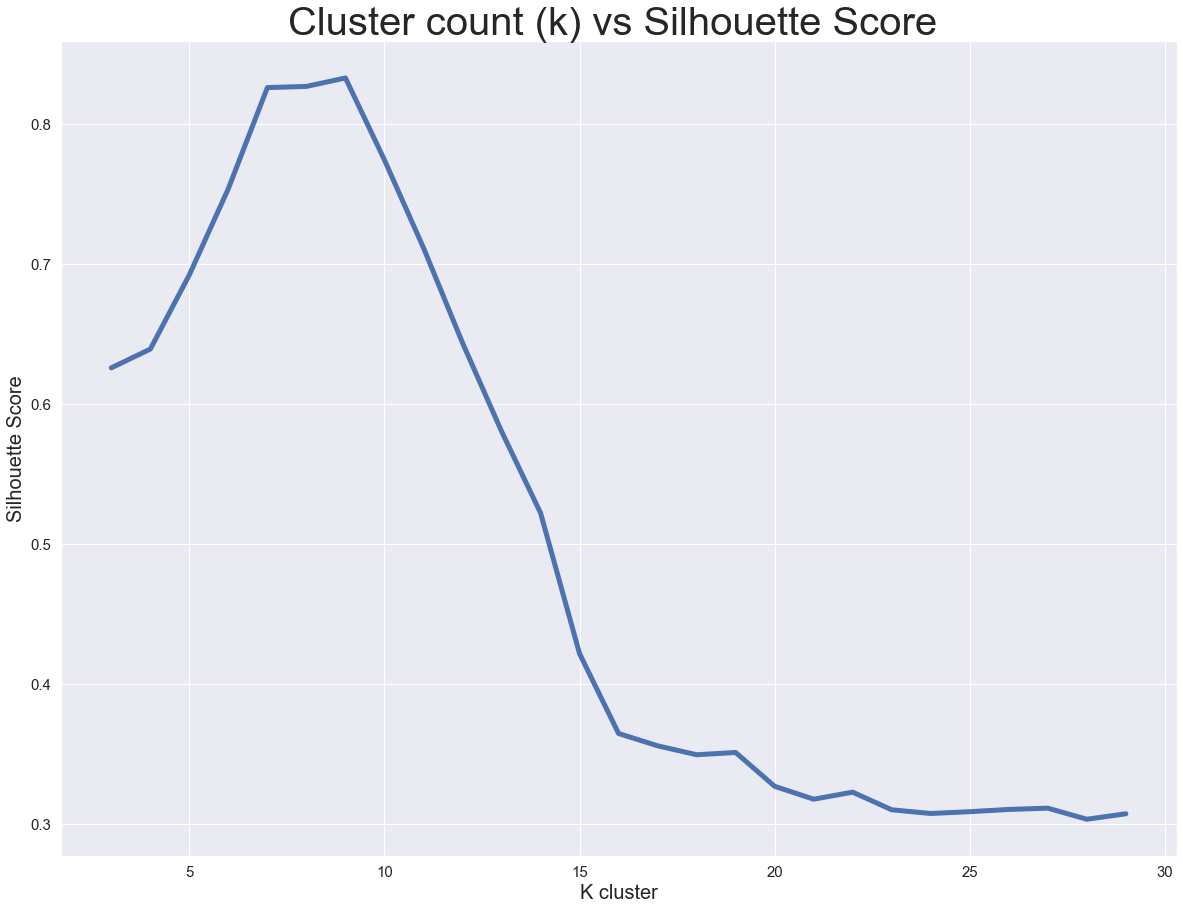

In [292]:
plt.figure(figsize=(20,15), )
cluster_scores = sns.lineplot(x=r['k'], y= r['silhouette_score'], linewidth = 5)
cluster_scores.axes.set_title("Cluster count (k) vs Silhouette Score ",fontsize=40)
cluster_scores.set_xlabel("K cluster",fontsize=20)
cluster_scores.set_ylabel("Silhouette Score",fontsize=20)
cluster_scores.tick_params(labelsize=15)
plt.savefig('cluster_scores_per_k.png')

In [105]:
r['silhouette_score']

[0.6256661429337039,
 0.6390691517962414,
 0.6920747182244511,
 0.7536393082219609,
 0.8257589175062543,
 0.8265823959914539,
 0.8326246614450671,
 0.774807544694714,
 0.7057761776707536,
 0.6477942741728239,
 0.5703401664958195,
 0.5087912939048966,
 0.42135348189272137,
 0.4181730869113912,
 0.3511231582400592,
 0.349618866315711,
 0.3445744012196581,
 0.32165255589997055,
 0.3210595556388046,
 0.3241353318859474,
 0.31487638976484184,
 0.31341380139291225,
 0.30378211846839887,
 0.3114911320404254,
 0.30902657280342083,
 0.30758765311812125,
 0.3084788765273082]

In [48]:
r['k']

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [49]:
# optimal number of clusters is 9

k_means = KMeans(n_clusters=9) 
k_means_fit = k_means.fit(df_final)


In [50]:
k_means_fit.labels_

array([6, 6, 6, ..., 8, 8, 7], dtype=int32)

In [51]:
df_labeled = df_final
df_labeled['clusters'] = k_means_fit.labels_

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [109]:
df_labeled.head()

,InclusionDistanceAvg,InclusionDistanceStdDev,NoOfCommittees,AttesterSlashings,VoluntaryExits,MissingBlocks,clusters
1,26.875,3.782387026,256,0,0,7,6
2,26.625,4.513420847,256,0,0,10,6
3,29.34375,3.694890762,256,0,0,12,6
4,27.8125,3.880783925,256,0,0,10,6
5,28.90625,3.062355987,256,0,0,10,6


In [110]:
type(df_labeled['clusters'][1])

numpy.int32

In [111]:
# sns.scatterplot(x='InclusionDistanceAvg', y='InclusionDistanceStdDev', hue='clusters', data=df_labeled)

In [117]:
import plotly.express as px
fig = (px.scatter_3d(df_labeled, x='InclusionDistanceAvg', y='InclusionDistanceStdDev', z='MissingBlocks', 
              color='clusters', size_max=10, opacity=0.5))

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [118]:
df_labeled

,InclusionDistanceAvg,InclusionDistanceStdDev,NoOfCommittees,AttesterSlashings,VoluntaryExits,MissingBlocks,clusters
1,26.875,3.782387026,256,0,0,7,6
2,26.625,4.513420847,256,0,0,10,6
3,29.34375,3.694890762,256,0,0,12,6
4,27.8125,3.880783925,256,0,0,10,6
5,28.90625,3.062355987,256,0,0,10,6
...,...,...,...,...,...,...,...
7139,25.3125,4.707149675,480,0,0,8,8
7140,23.03125,7.150386297,480,0,0,7,8
7141,24.5625,5.673580539,480,0,0,8,8
7142,22.5,5.819876952,480,0,0,7,8


In [122]:
# Computing Dunn test results for all of the following

# InclusionDistanceAvg vs clusters
# InclusionDistanceStdDev vs clusters
# NoOfCommittees vs clusters
# AttesterSlashings vs clusters
# VoluntaryExits vs clusters
# MissingBlocks vs clusters

df_inc_dist_avg = df_labeled[['InclusionDistanceAvg', 'clusters']]
df_inc_dist_stdev = df_labeled[['InclusionDistanceStdDev', 'clusters']]
# df_num_committees = df_labeled[['NoOfCommittees', 'clusters']]
df_att_slashings = df_labeled[['AttesterSlashings', 'clusters']]
df_vol_exits = df_labeled[['VoluntaryExits', 'clusters']]
df_missing_blocks = df_labeled[['MissingBlocks', 'clusters']]

dfs = [df_inc_dist_avg, df_inc_dist_stdev, df_att_slashings, df_vol_exits, df_missing_blocks]

In [168]:
# make sure leading column is numeric

for i in range(5):
    dfs[i][dfs[i].columns[0]] = pd.to_numeric(dfs[i][dfs[i].columns[0]])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [125]:
dunn_test_results_raw = []

for df in dfs:
    cols = df.columns
    dunn_test_results_raw.append(sp.posthoc_dunn(df, val_col=cols[0], group_col=cols[1], p_adjust = 'bonferroni'))


In [128]:
len(dunn_test_results_raw)

5

In [132]:
dunn_test_results_modified = []

for i, r in enumerate(dunn_test_results_raw):
    dunn_test_results_modified.append({ element: [] for element in r.columns })
    for column in r.columns:
        for item in r[column]:
            if item <= 0.01:
                dunn_test_results_modified[i][column].append(1)
            else:
                dunn_test_results_modified[i][column].append(0)

In [134]:
dunn_test_results_modified_dfs = [ pd.DataFrame(df) for df in dunn_test_results_modified ]

In [143]:
dunn_test_results_modified_dfs[0]

,0,1,2,3,4,5,6,7,8
0,0,1,0,1,1,1,1,0,0
1,1,0,1,1,1,1,1,0,1
2,0,1,0,0,1,1,1,0,0
3,1,1,0,0,0,0,1,0,0
4,1,1,1,0,0,0,1,0,0
5,1,1,1,0,0,0,1,0,0
6,1,1,1,1,1,1,0,0,1
7,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,1,0,0


In [150]:
# Saving output dfs
for i in range(5):
    pd.DataFrame(dunn_test_results_modified_dfs[i], index=dunn_test_results_modified_dfs[i].columns).to_csv(f'dunn_test_clusters_output_{dfs[i].columns[0]}.csv')

In [151]:
df_labeled.head()

,InclusionDistanceAvg,InclusionDistanceStdDev,NoOfCommittees,AttesterSlashings,VoluntaryExits,MissingBlocks,clusters
1,26.875,3.782387026,256,0,0,7,6
2,26.625,4.513420847,256,0,0,10,6
3,29.34375,3.694890762,256,0,0,12,6
4,27.8125,3.880783925,256,0,0,10,6
5,28.90625,3.062355987,256,0,0,10,6


In [266]:
median_per_cluster_dfs = [] 
for df in dfs:
    median_per_cluster_dfs.append(df.groupby('clusters')
                                          .median()
                                          .reset_index()
                                          .sort_values(df.columns[1], ascending=False))

In [267]:
avgs_per_cluster_dfs = [] 
for df in dfs:
    avgs_per_cluster_dfs.append(df.groupby('clusters')
                                        .mean()
                                        .reset_index()
                                        .sort_values(df.columns[1], ascending=False))

In [268]:
stdev_per_cluster_dfs = [] 
for df in dfs:
    stdev_per_cluster_dfs.append(df.groupby('clusters')
                                         .std()
                                         .reset_index()
                                         .sort_values(df.columns[1], ascending=False))
    

In [271]:
for df in median_per_cluster_dfs:
    df.sort_values(df.columns[1], ascending=False, inplace=True)
    
for df in avgs_per_cluster_dfs:
    df.sort_values(df.columns[1], ascending=False, inplace=True)
    
for df in stdev_per_cluster_dfs:
    df.sort_values(df.columns[1], ascending=False, inplace=True)

In [270]:
median_per_cluster_dfs

[   clusters  InclusionDistanceAvg
 6         6             27.593750
 7         7             27.500000
 1         1             26.187500
 5         5             23.625000
 4         4             23.500000
 8         8             23.343750
 3         3             23.265625
 2         2             22.750000
 0         0             22.687500,
    clusters  InclusionDistanceStdDev
 2         2                 7.229462
 0         0                 7.206628
 5         5                 6.728610
 3         3                 6.611863
 4         4                 6.082431
 8         8                 5.898288
 1         1                 5.245197
 7         7                 4.949747
 6         6                 4.433992,
    clusters  AttesterSlashings
 8         8                  0
 7         7                  0
 6         6                  0
 5         5                  0
 4         4                  0
 3         3                  0
 2         2                  0
 1         1

[None, None, None, None, None]

In [229]:
median_per_cluster_dfs[1].columns

Index(['clusters', 'InclusionDistanceStdDev'], dtype='object')

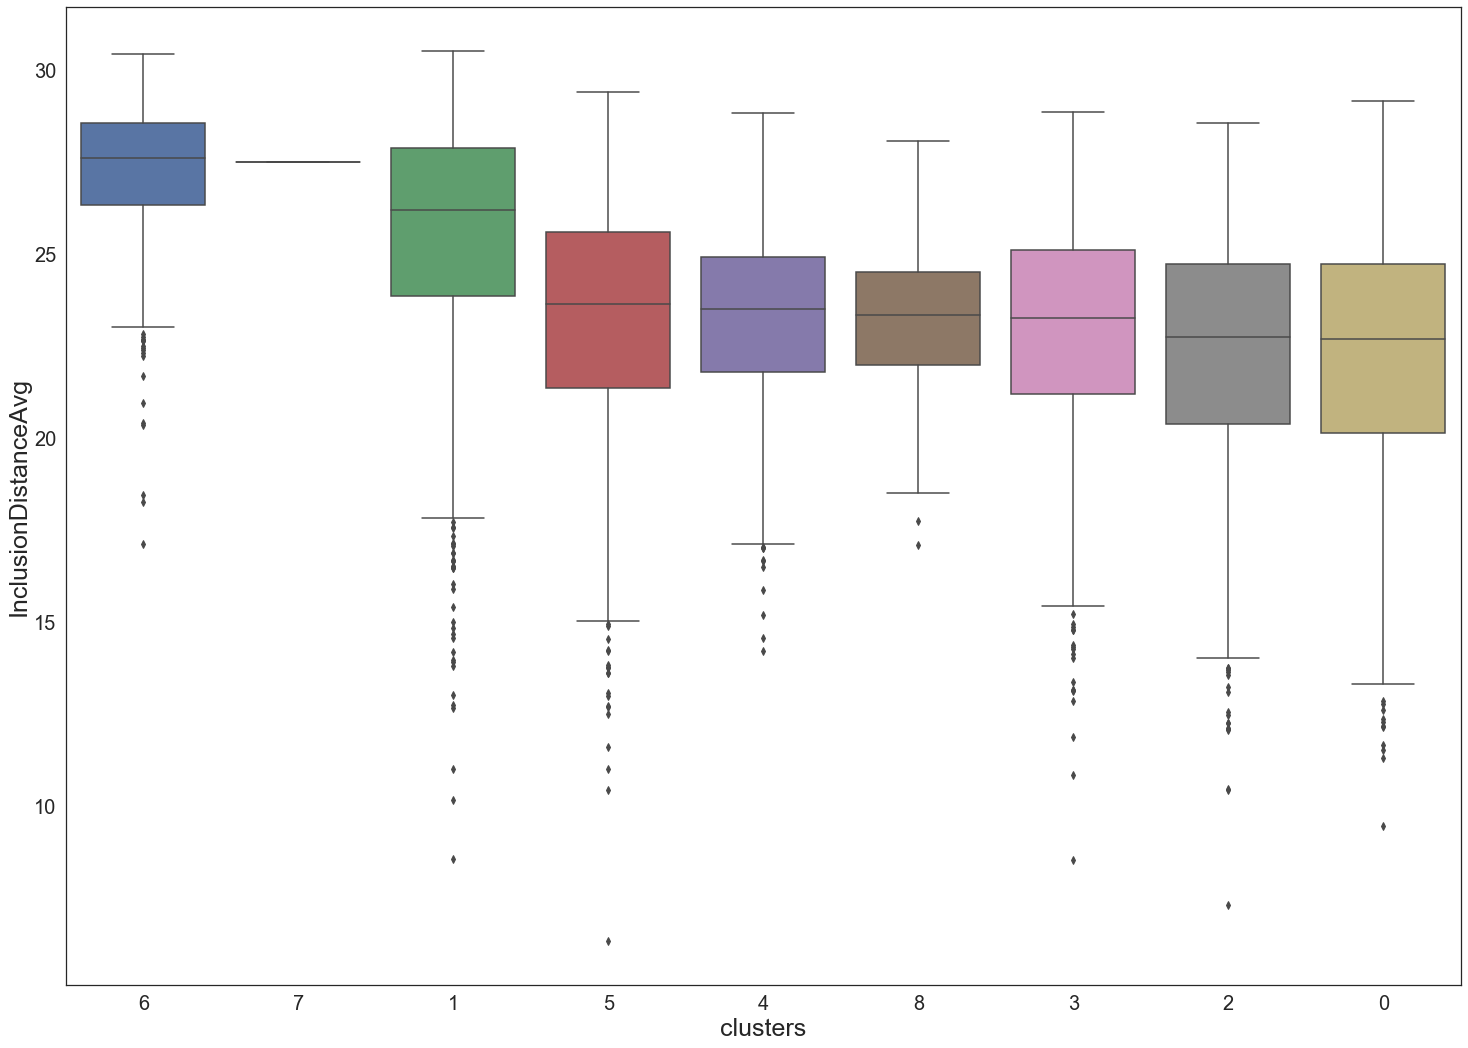

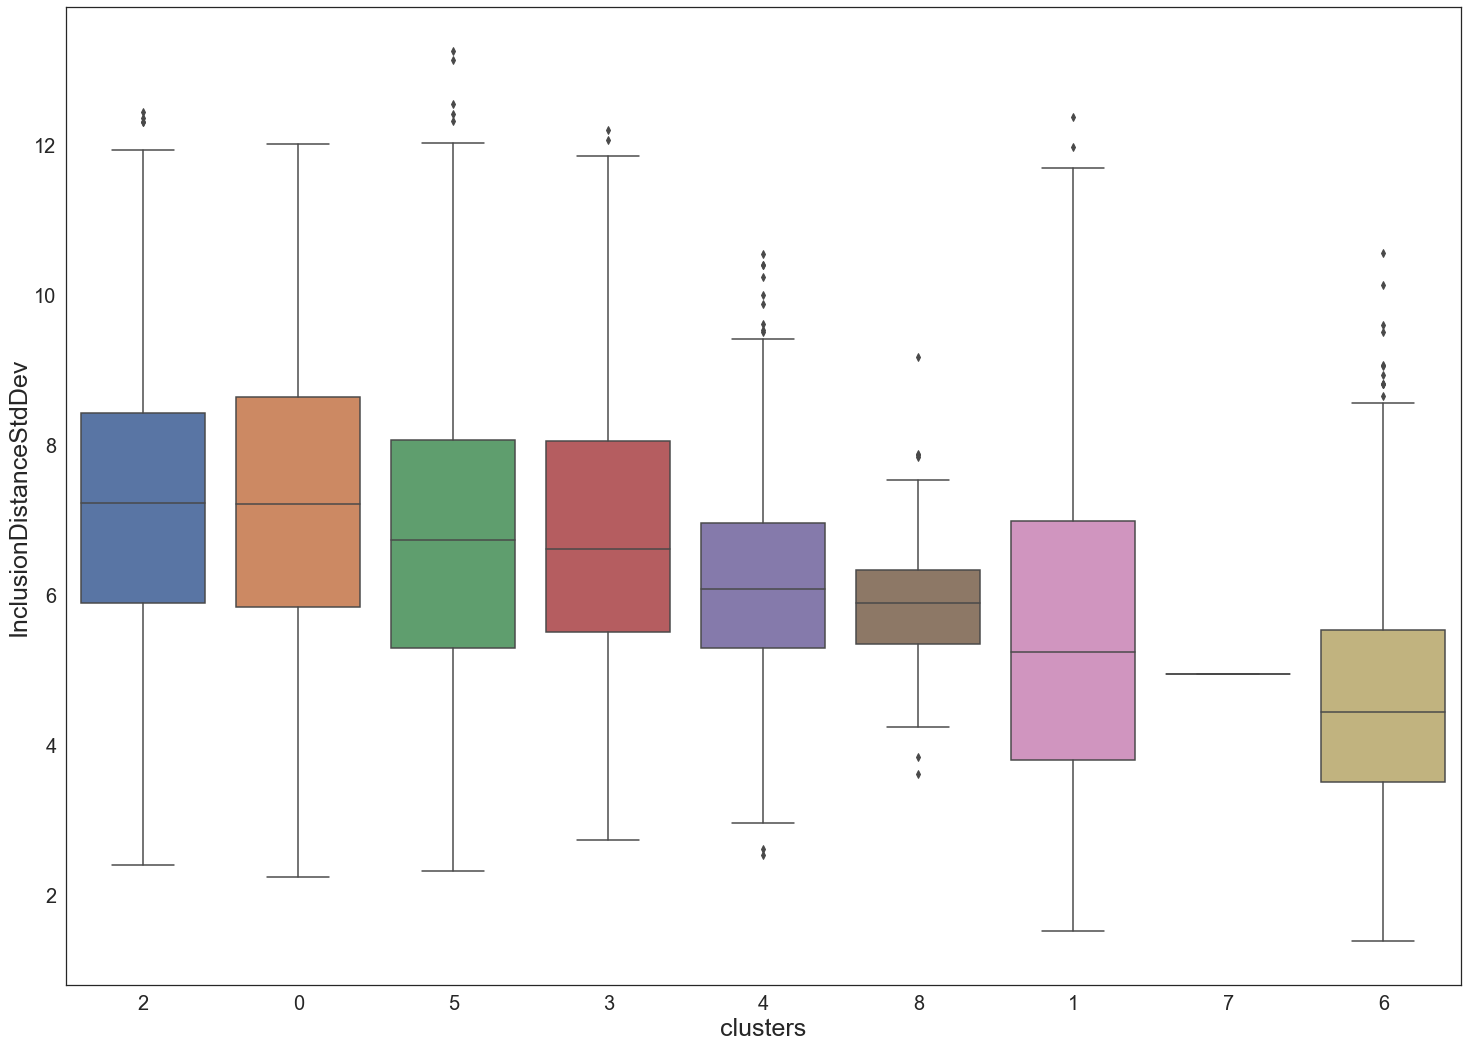

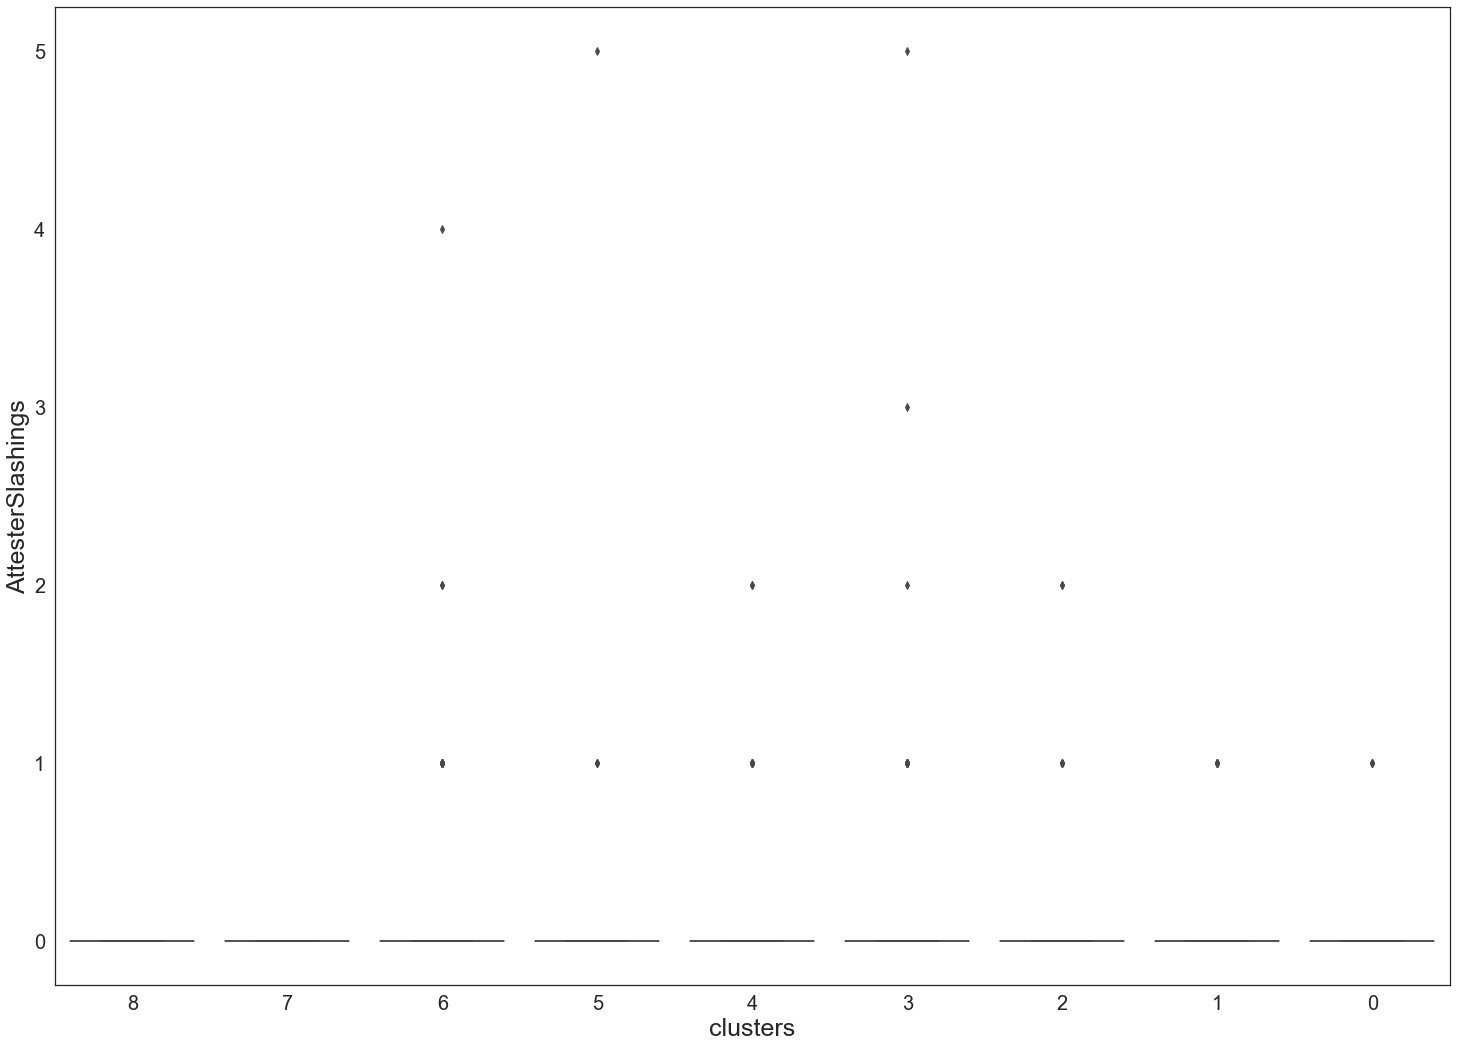

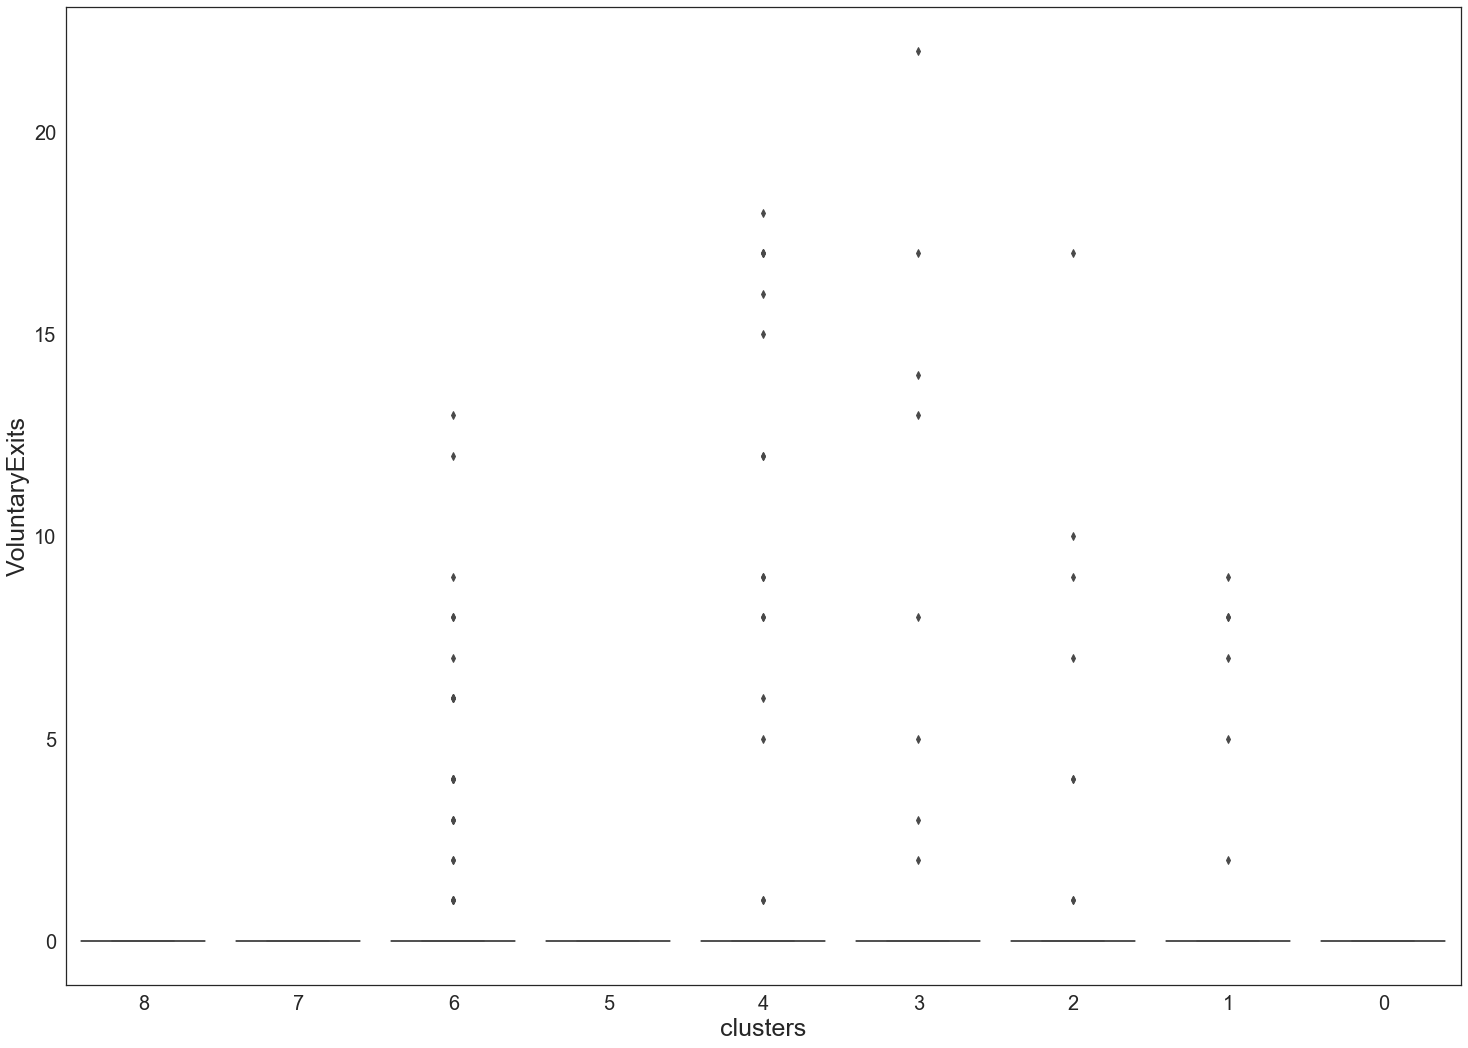

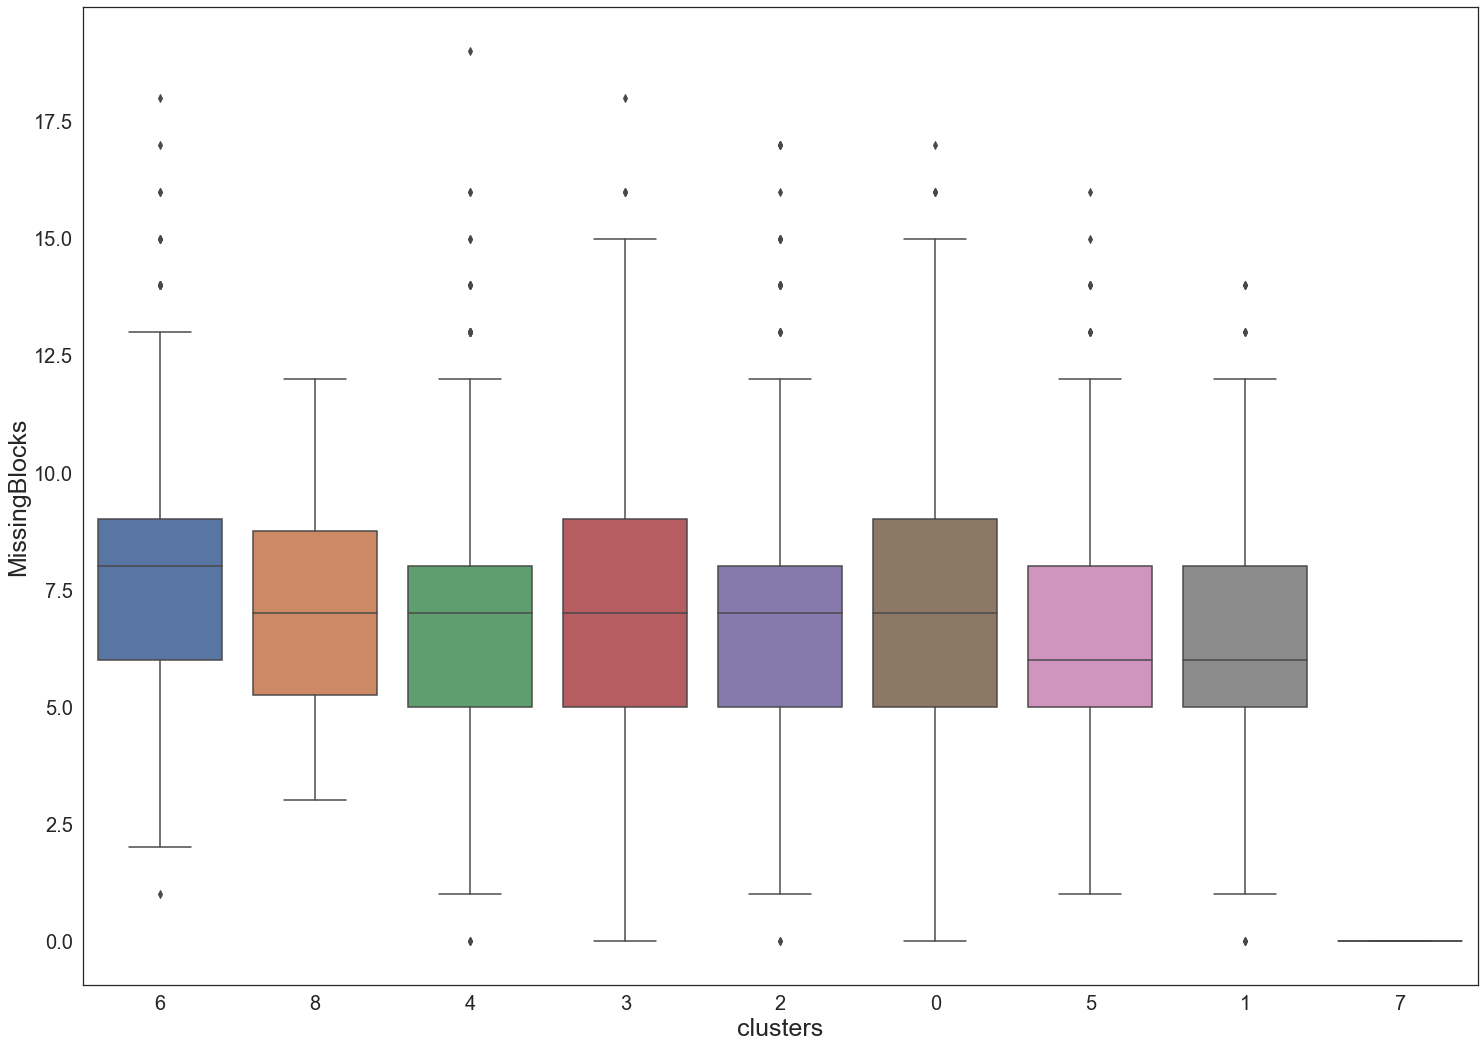

In [283]:
# Box plots!
sns.set_style(style='white')

for i, df in enumerate(dfs):
    plt.figure(figsize=(25,18))
    a = sns.boxplot(x=df.columns[1], y=df.columns[0], data=df, order=median_per_cluster_dfs[i].index)
    a.set_xlabel(df.columns[1],fontsize=25)
    a.set_ylabel(df.columns[0],fontsize=25)
    a.tick_params(labelsize=20)
    plt.savefig(f'boxplots/boxplot_{df.columns[0]}_{df.columns[1]}.png')

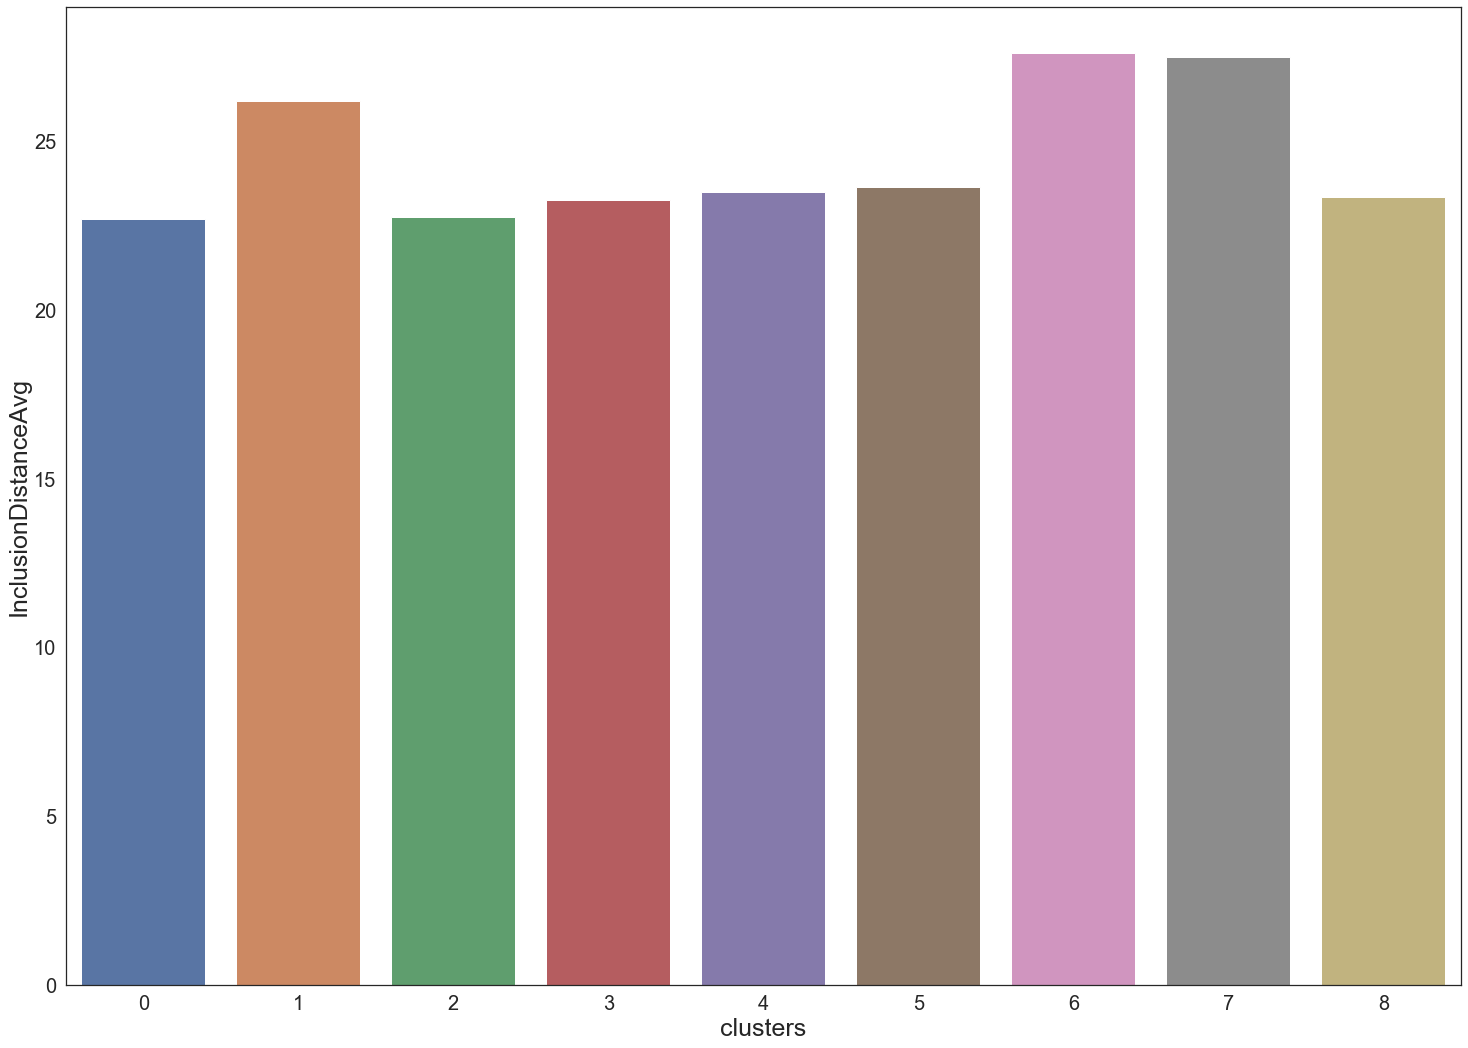

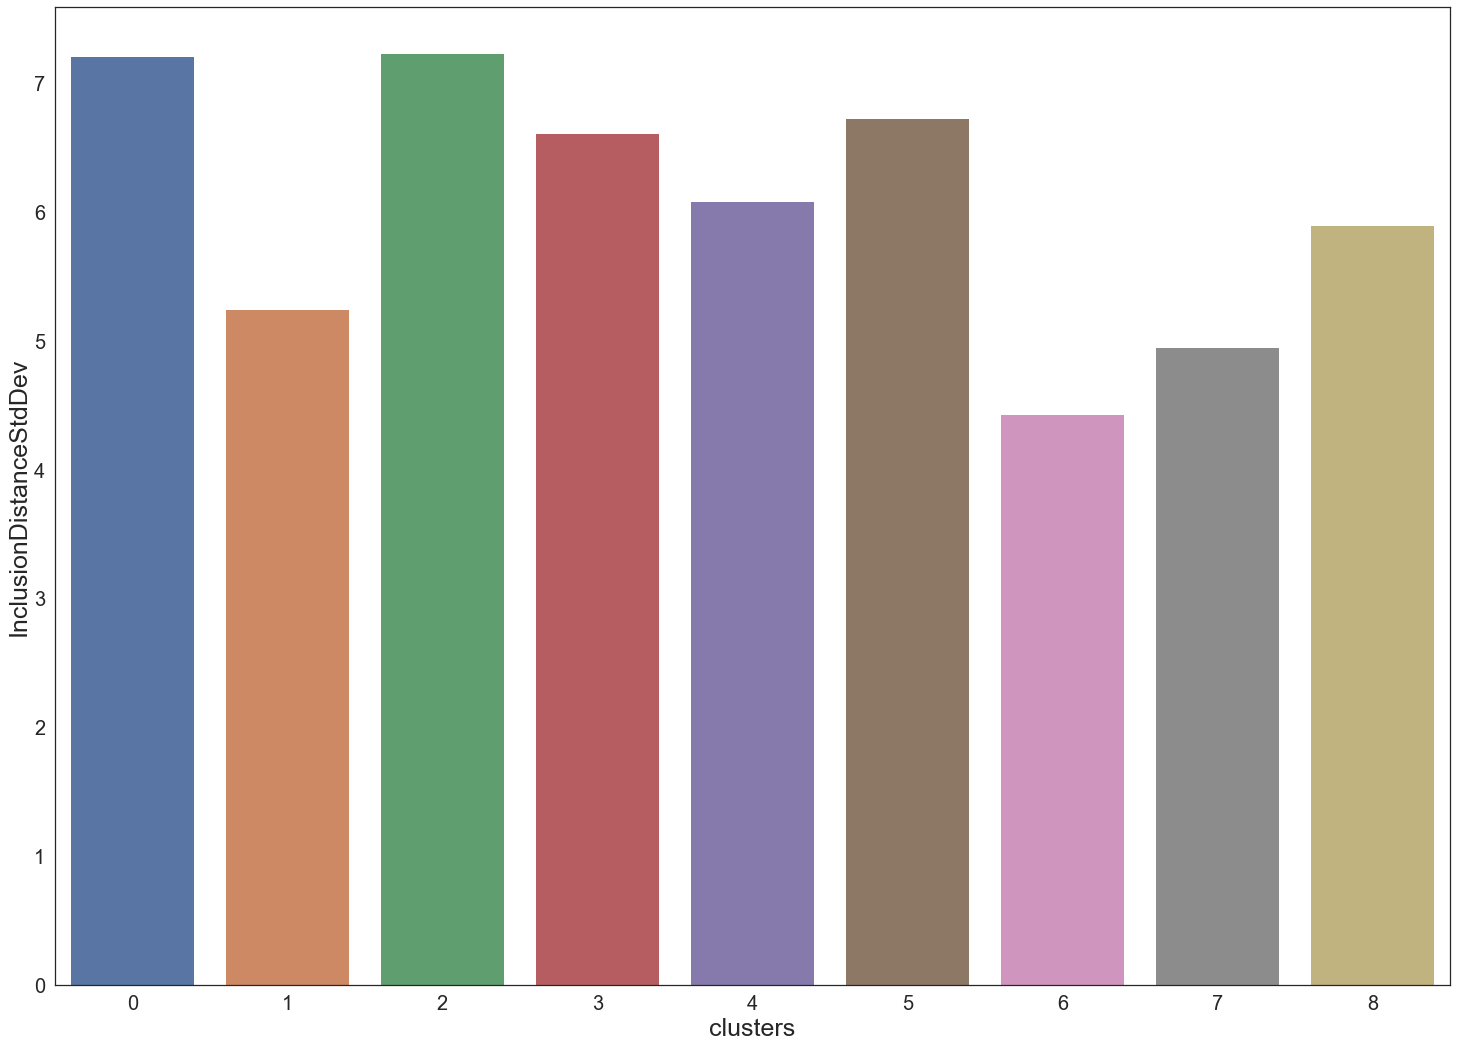

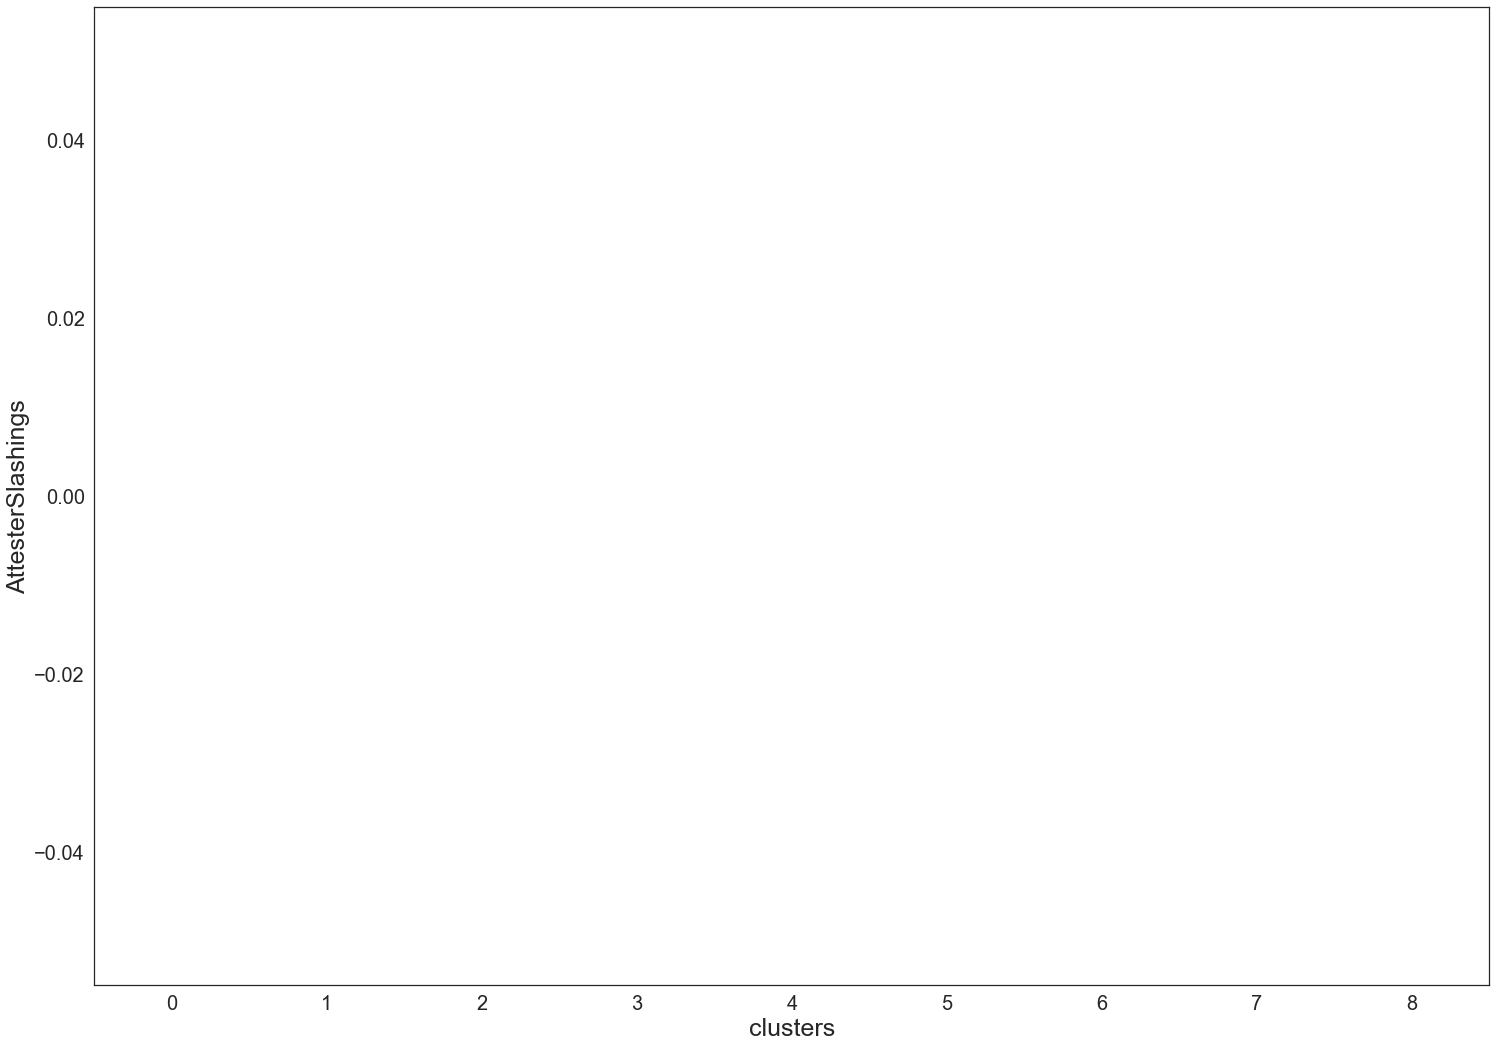

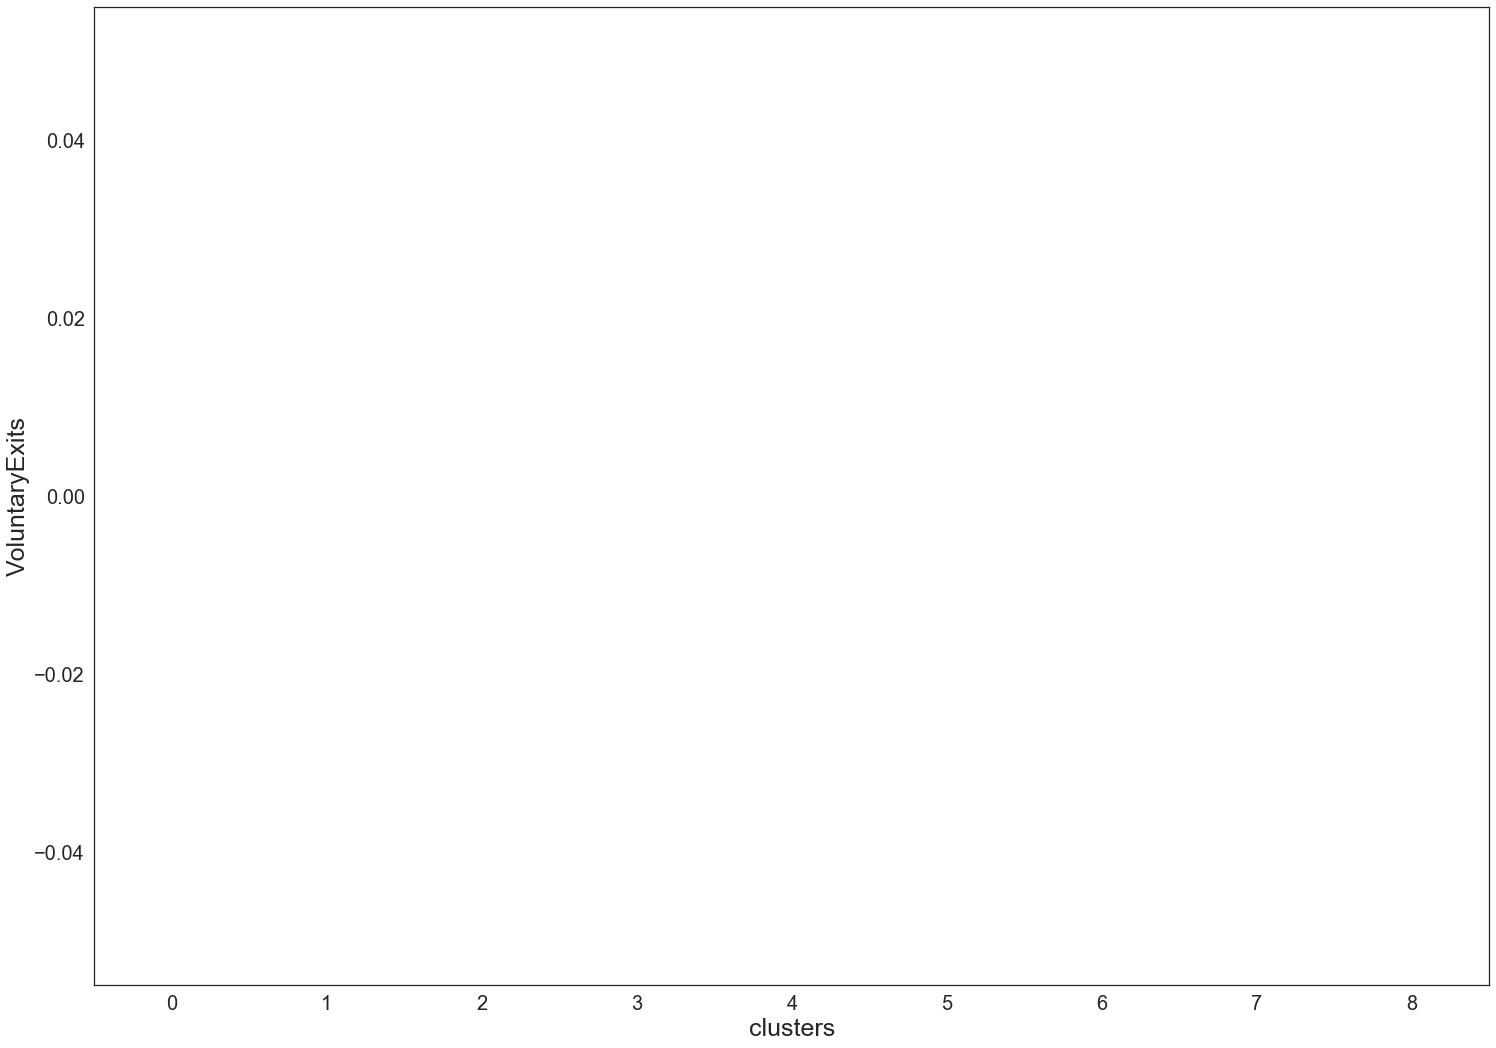

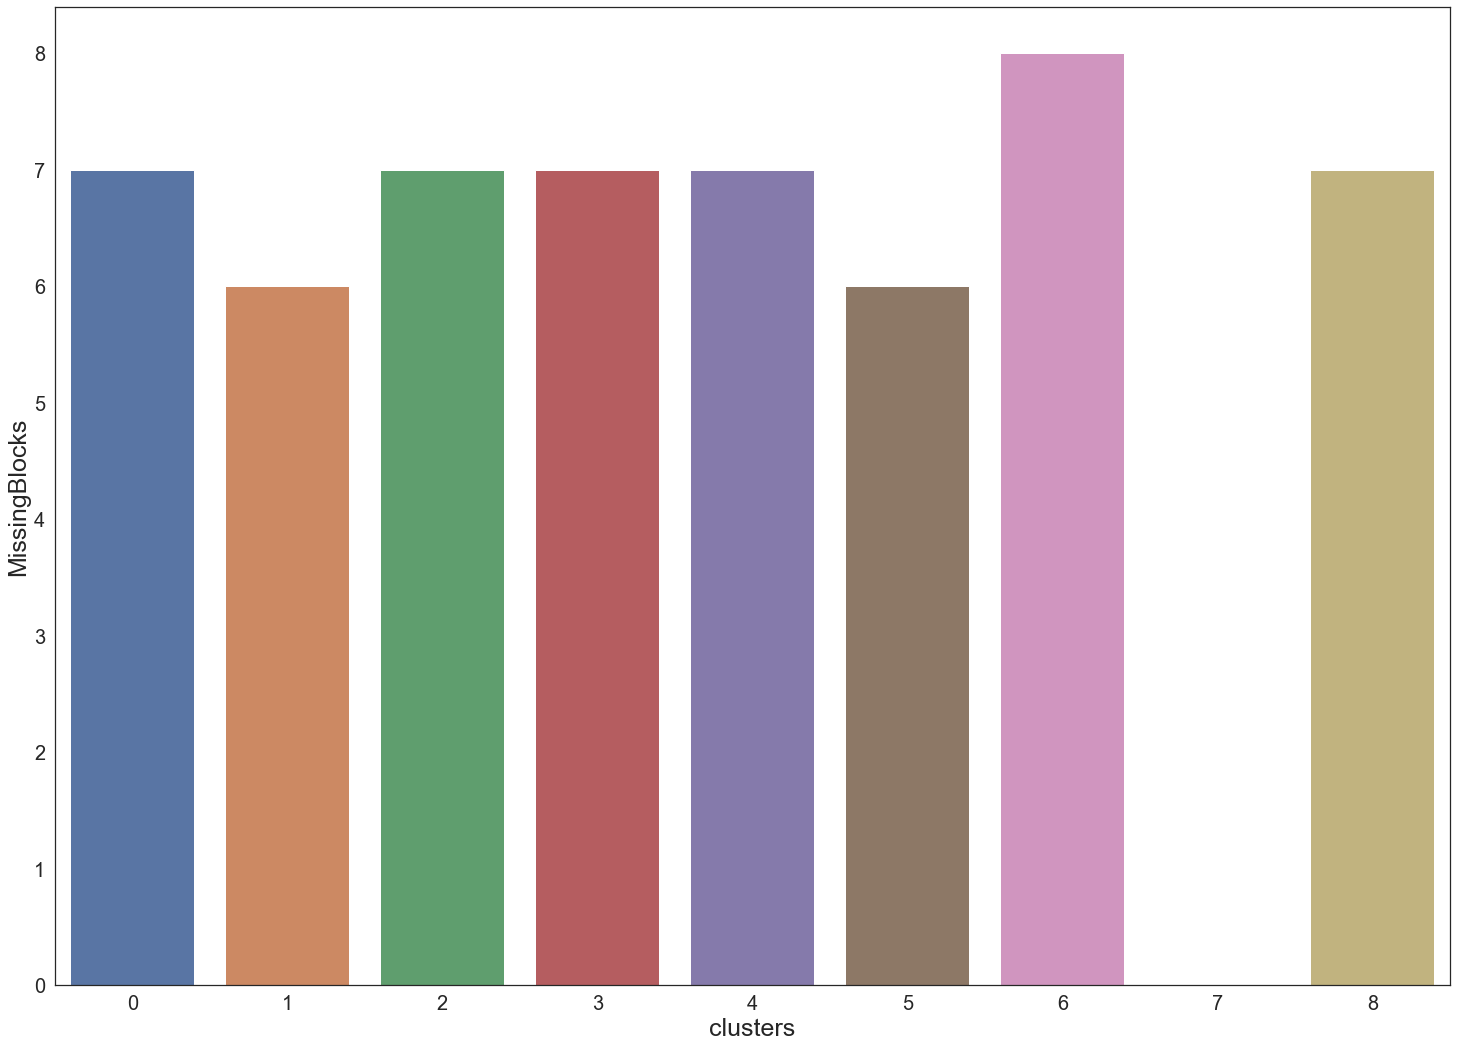

In [284]:
# Bar plots!
sns.set_style(style='white')

for i, df in enumerate(median_per_cluster_dfs):
    plt.figure(figsize=(25,18))
    a = sns.barplot(x=df.columns[0], y=df.columns[1], data=df)
    a.set_xlabel(df.columns[0],fontsize=25)
    a.set_ylabel(df.columns[1],fontsize=25)
    a.tick_params(labelsize=20)
    plt.savefig(f'barplots/barplot_{df.columns[0]}_{df.columns[1]}.png')

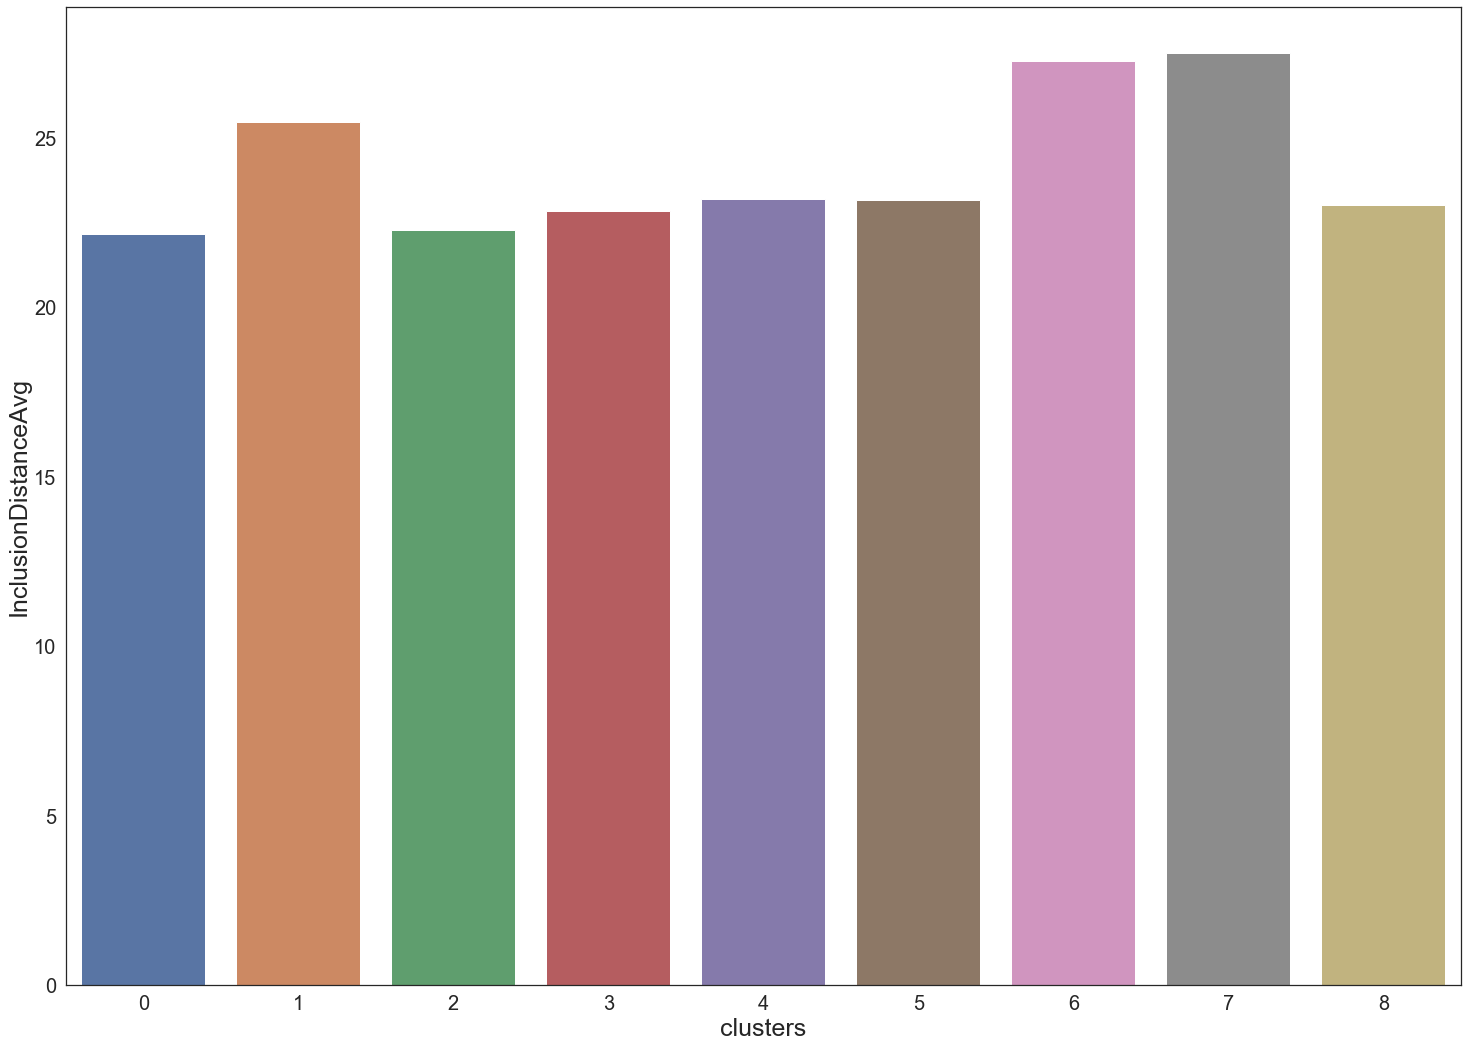

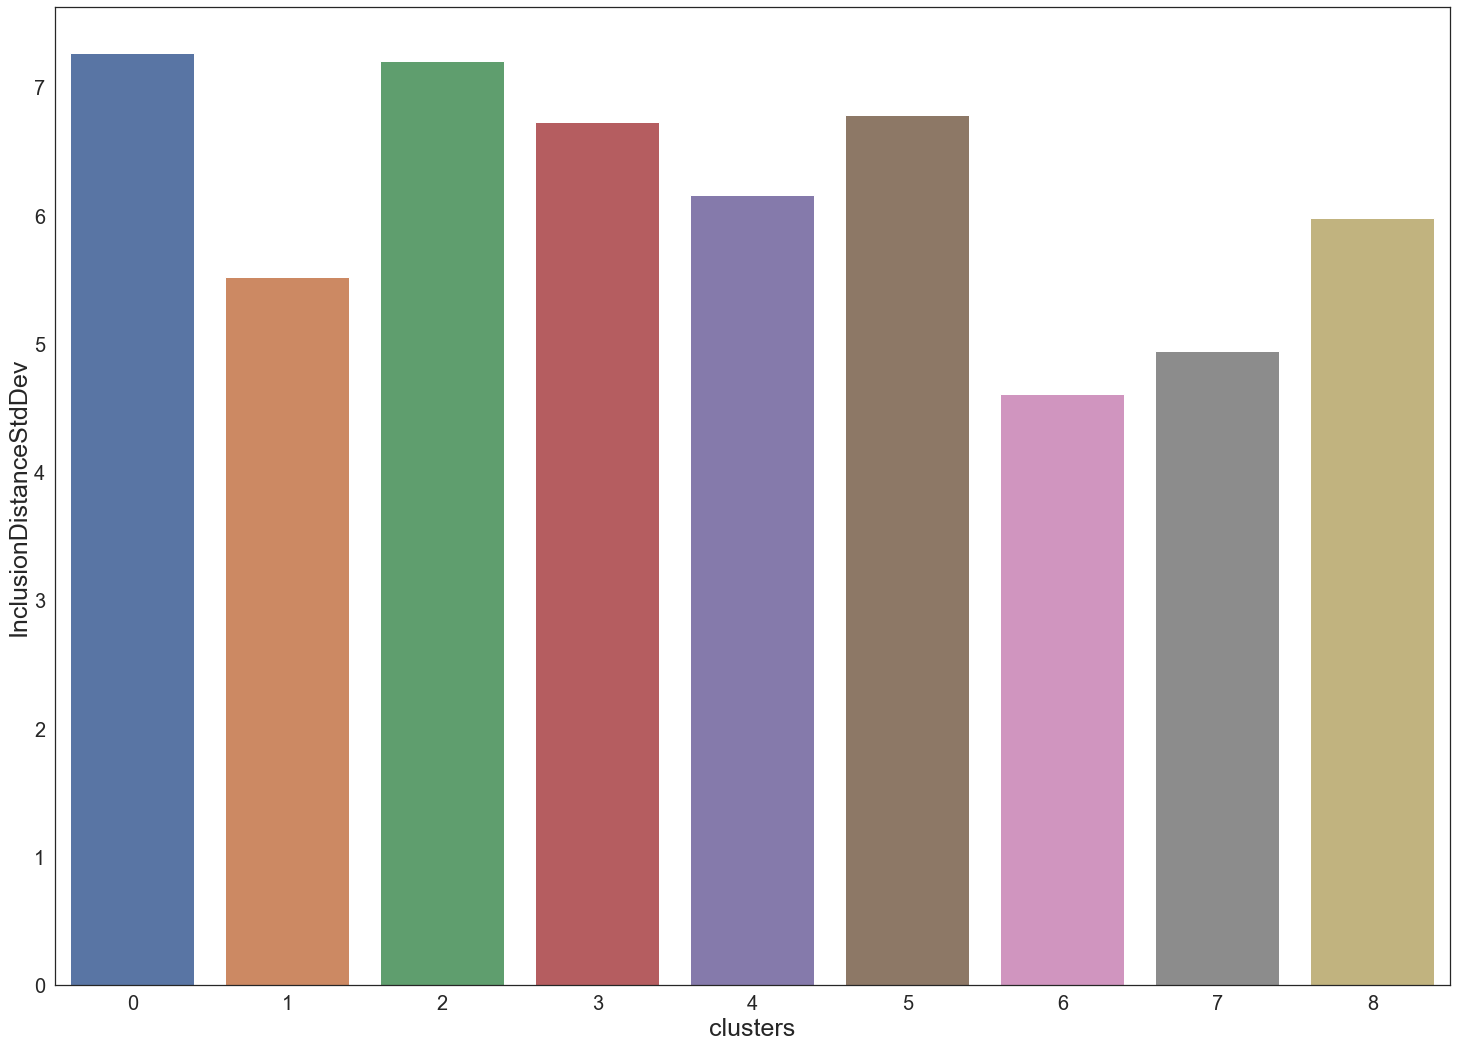

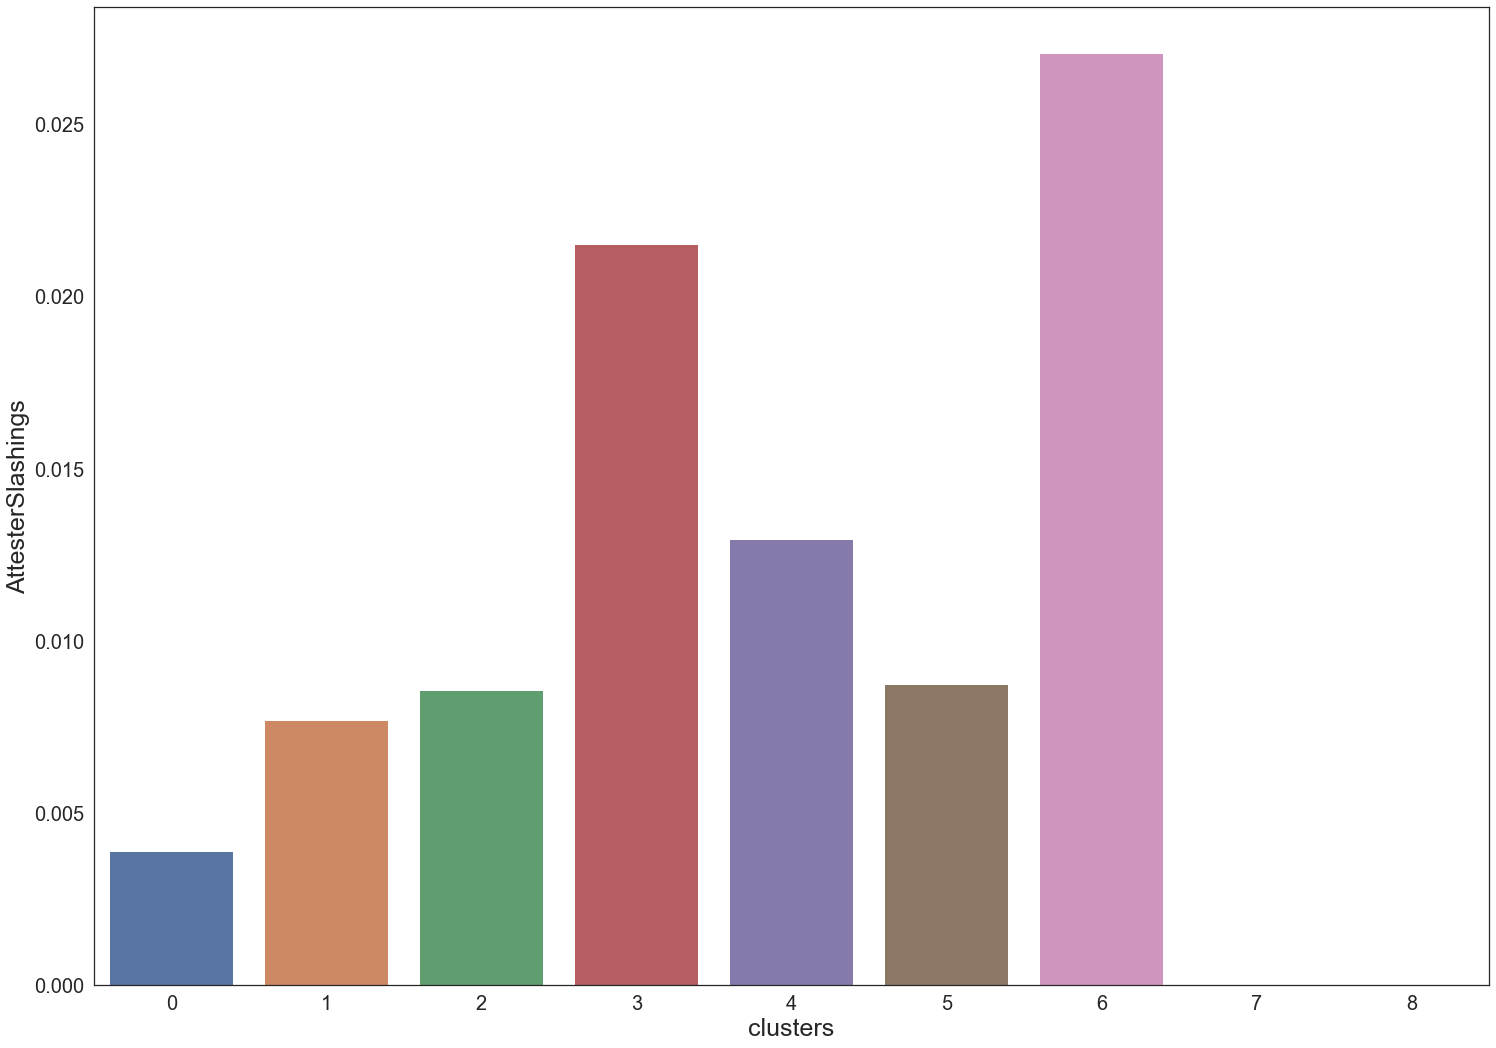

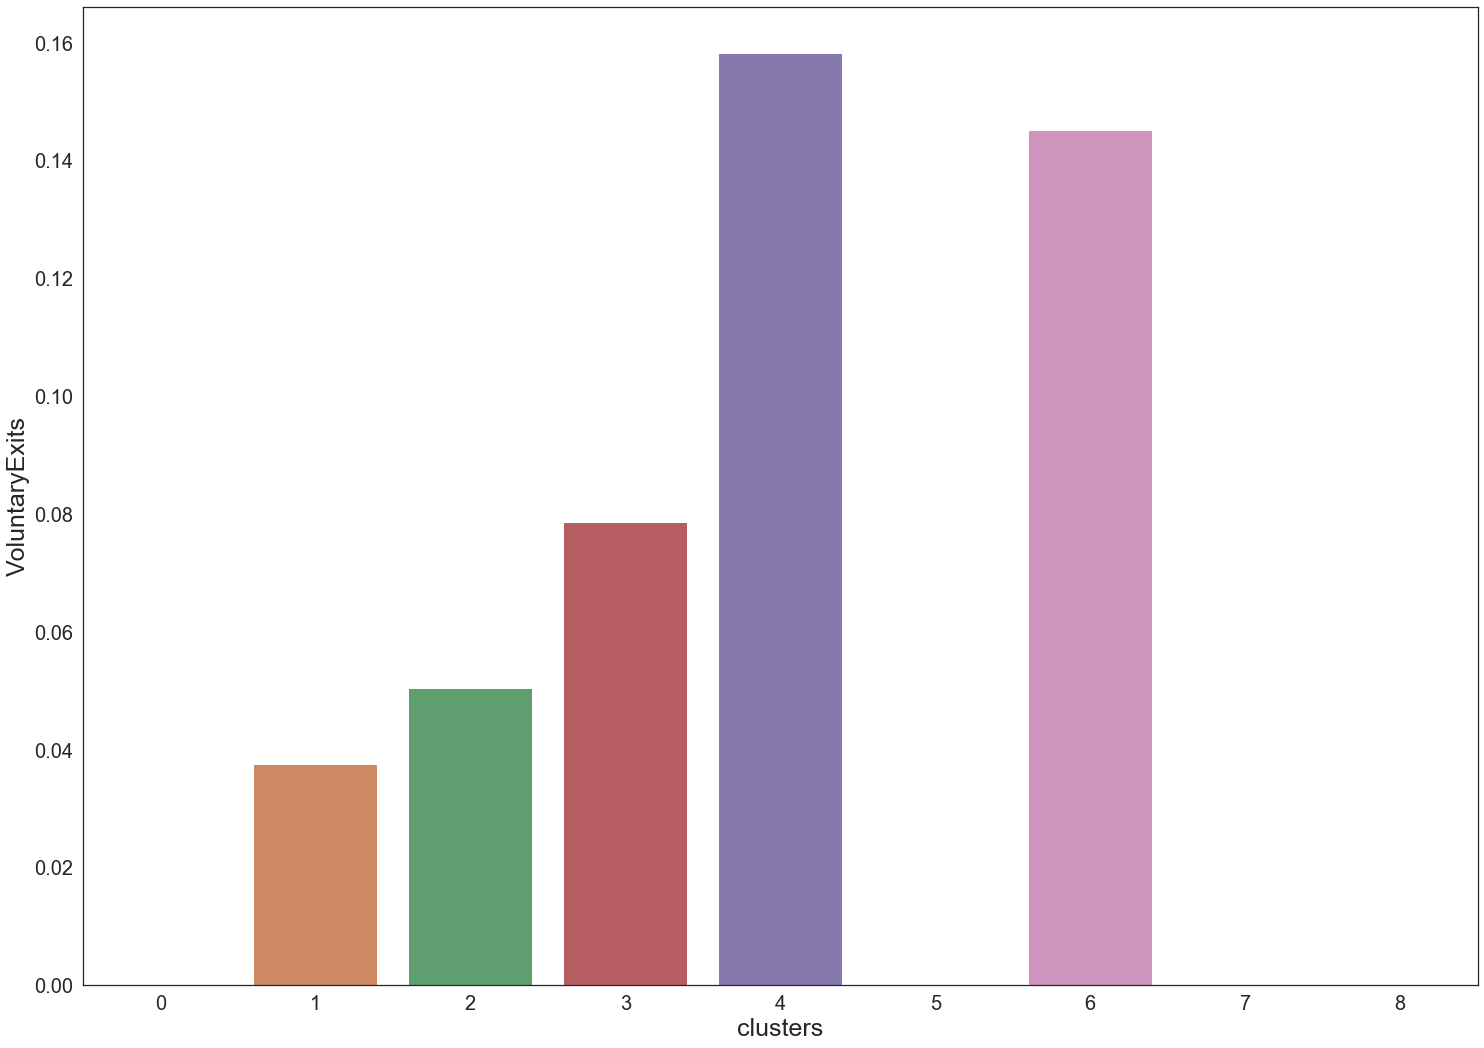

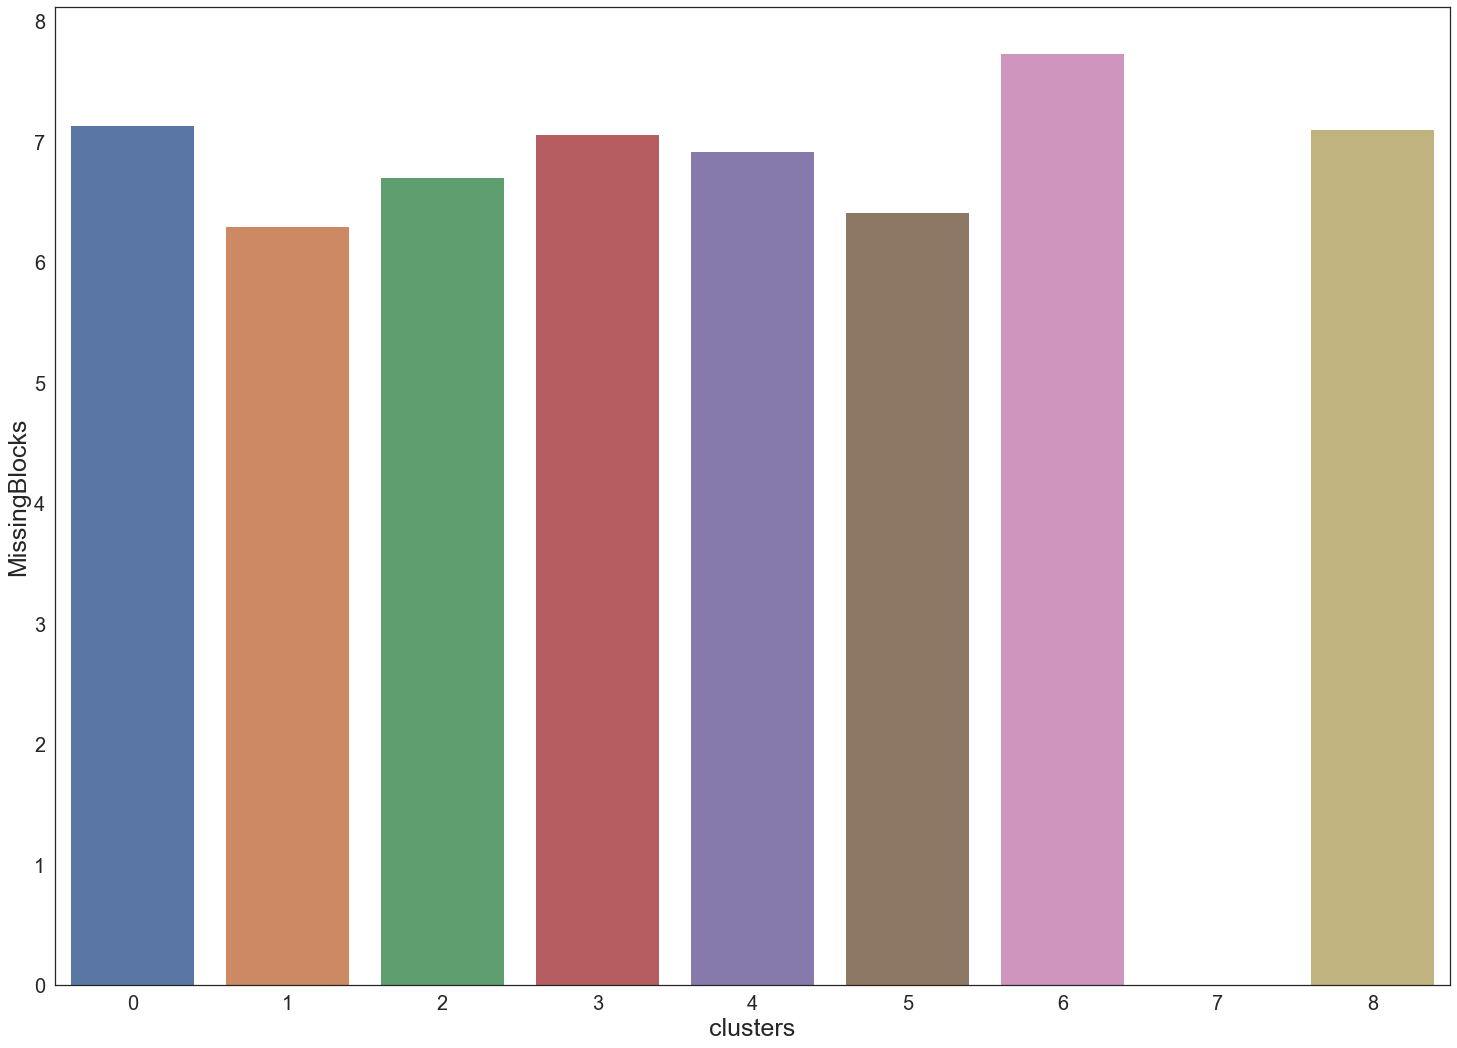

In [285]:
# Bar plots!
sns.set_style(style='white')

for i, df in enumerate(avgs_per_cluster_dfs):
    plt.figure(figsize=(25,18))
    a = sns.barplot(x=df.columns[0], y=df.columns[1], data=df)
    a.set_xlabel(df.columns[0],fontsize=25)
    a.set_ylabel(df.columns[1],fontsize=25)
    a.tick_params(labelsize=20)
    plt.savefig(f'barplots/barplot_{df.columns[0]}_{df.columns[1]}.png')

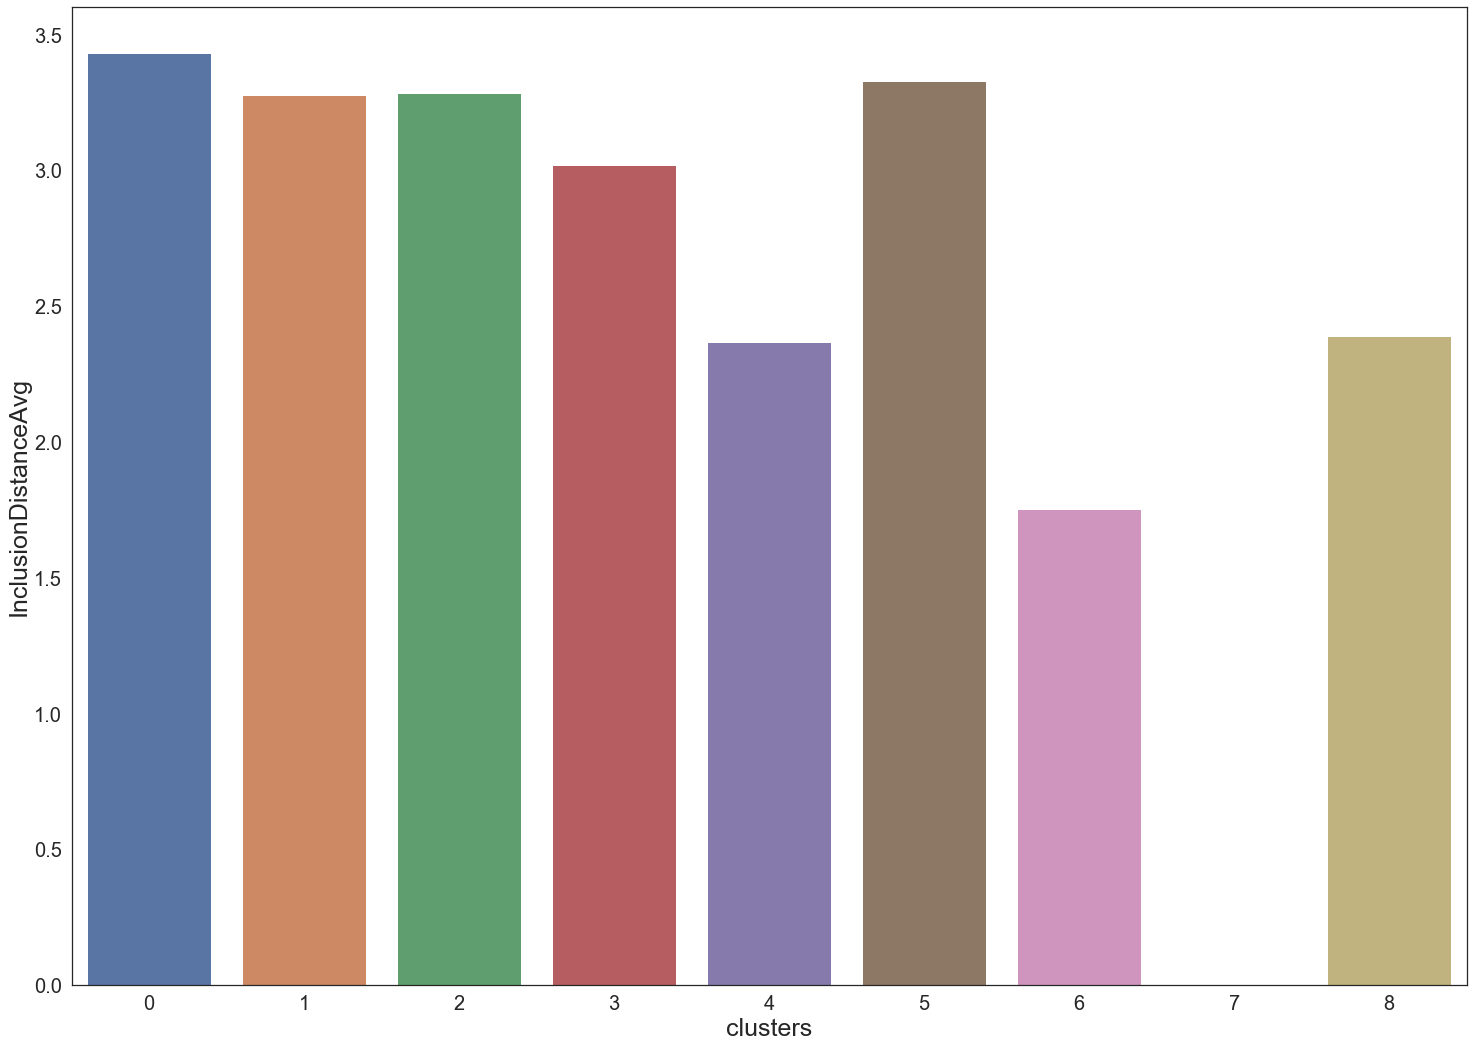

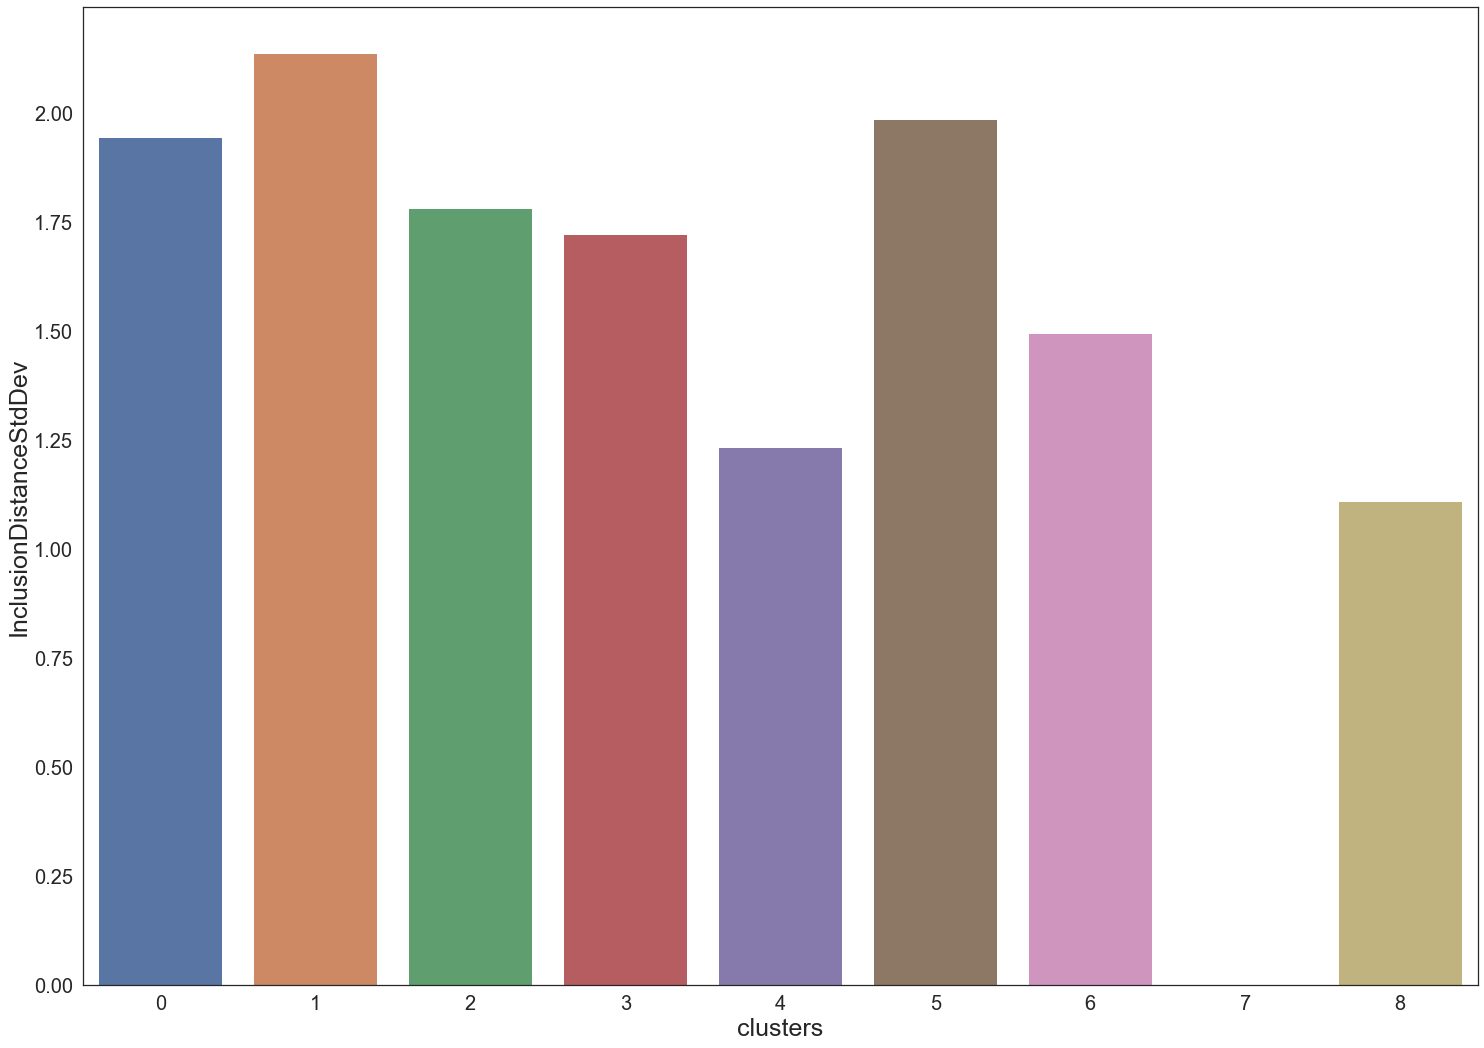

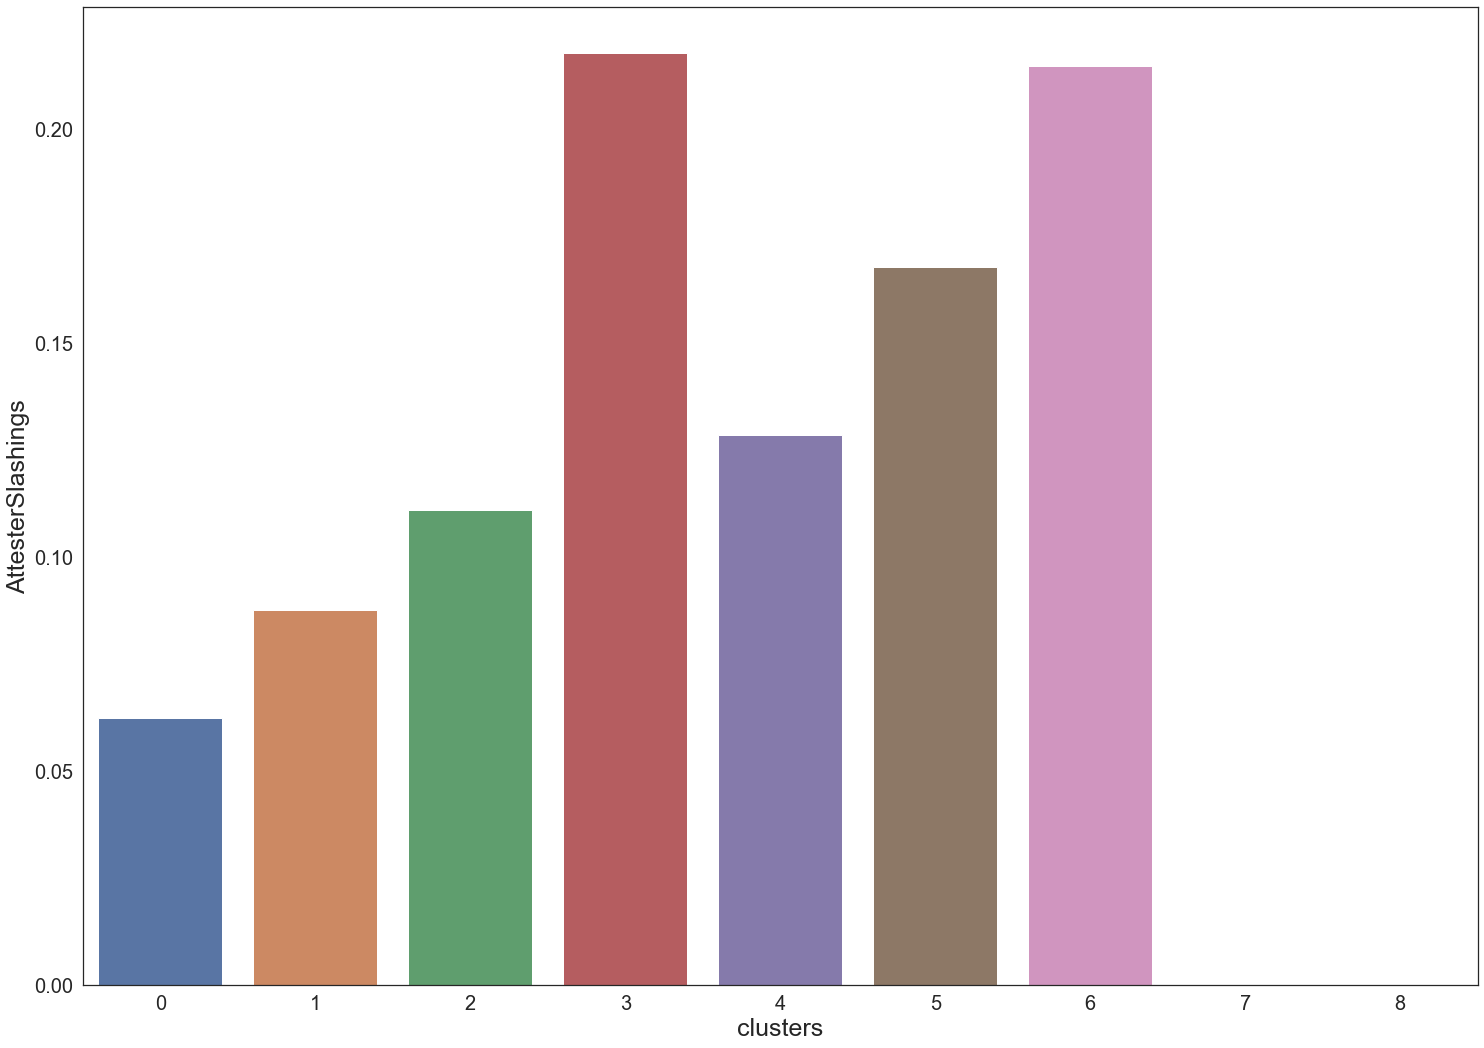

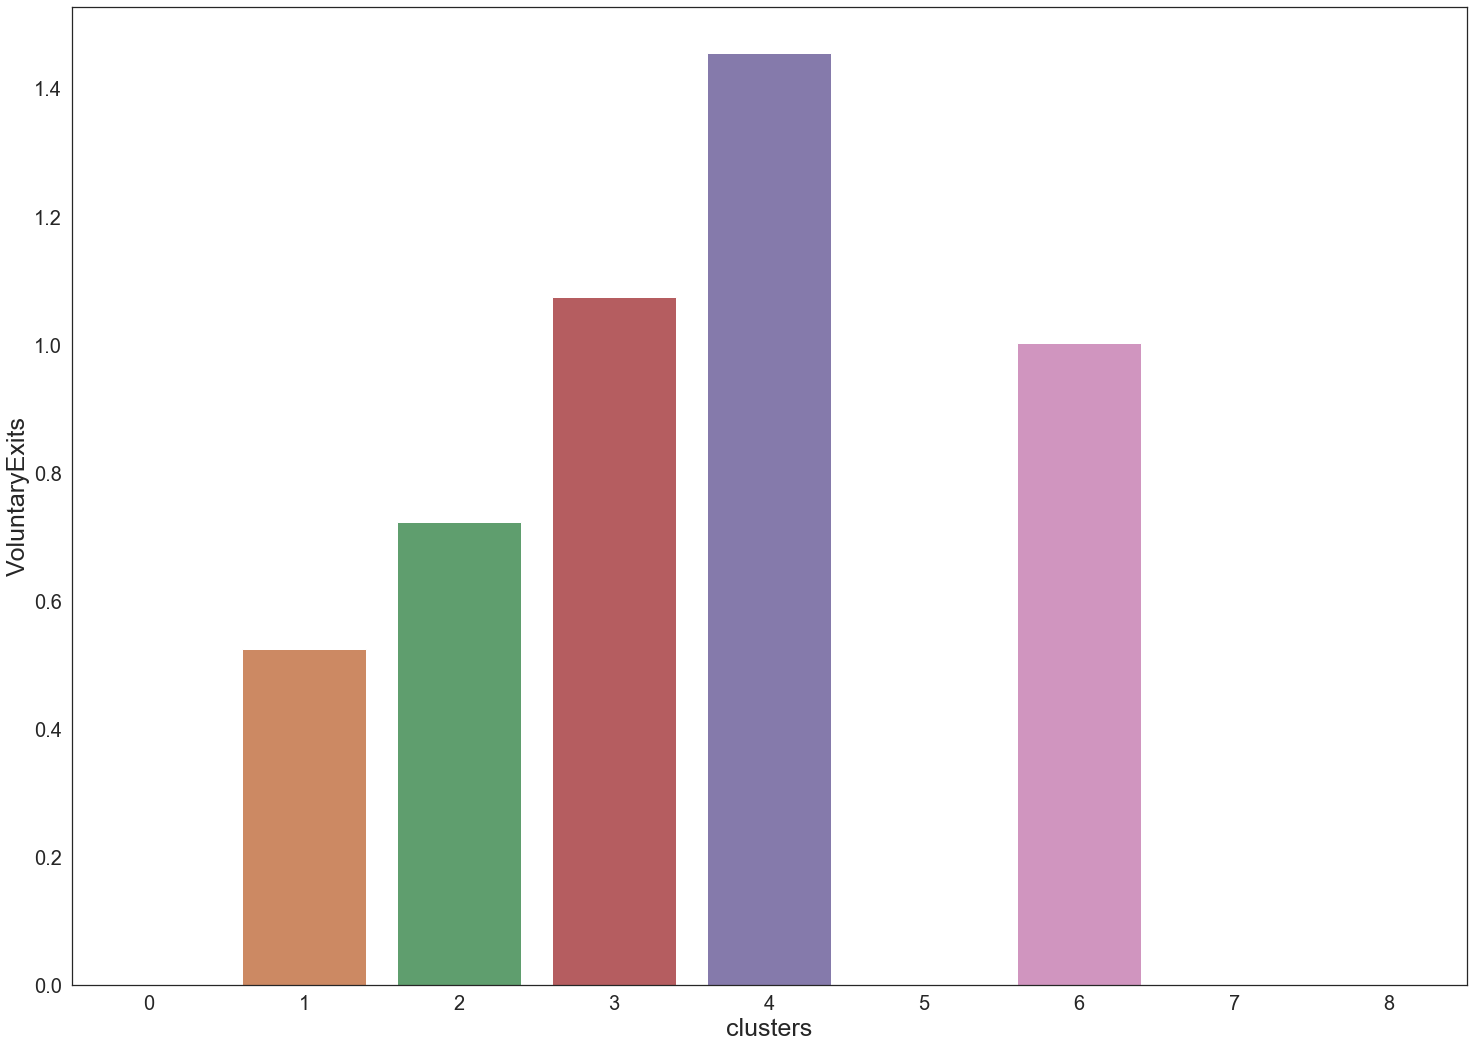

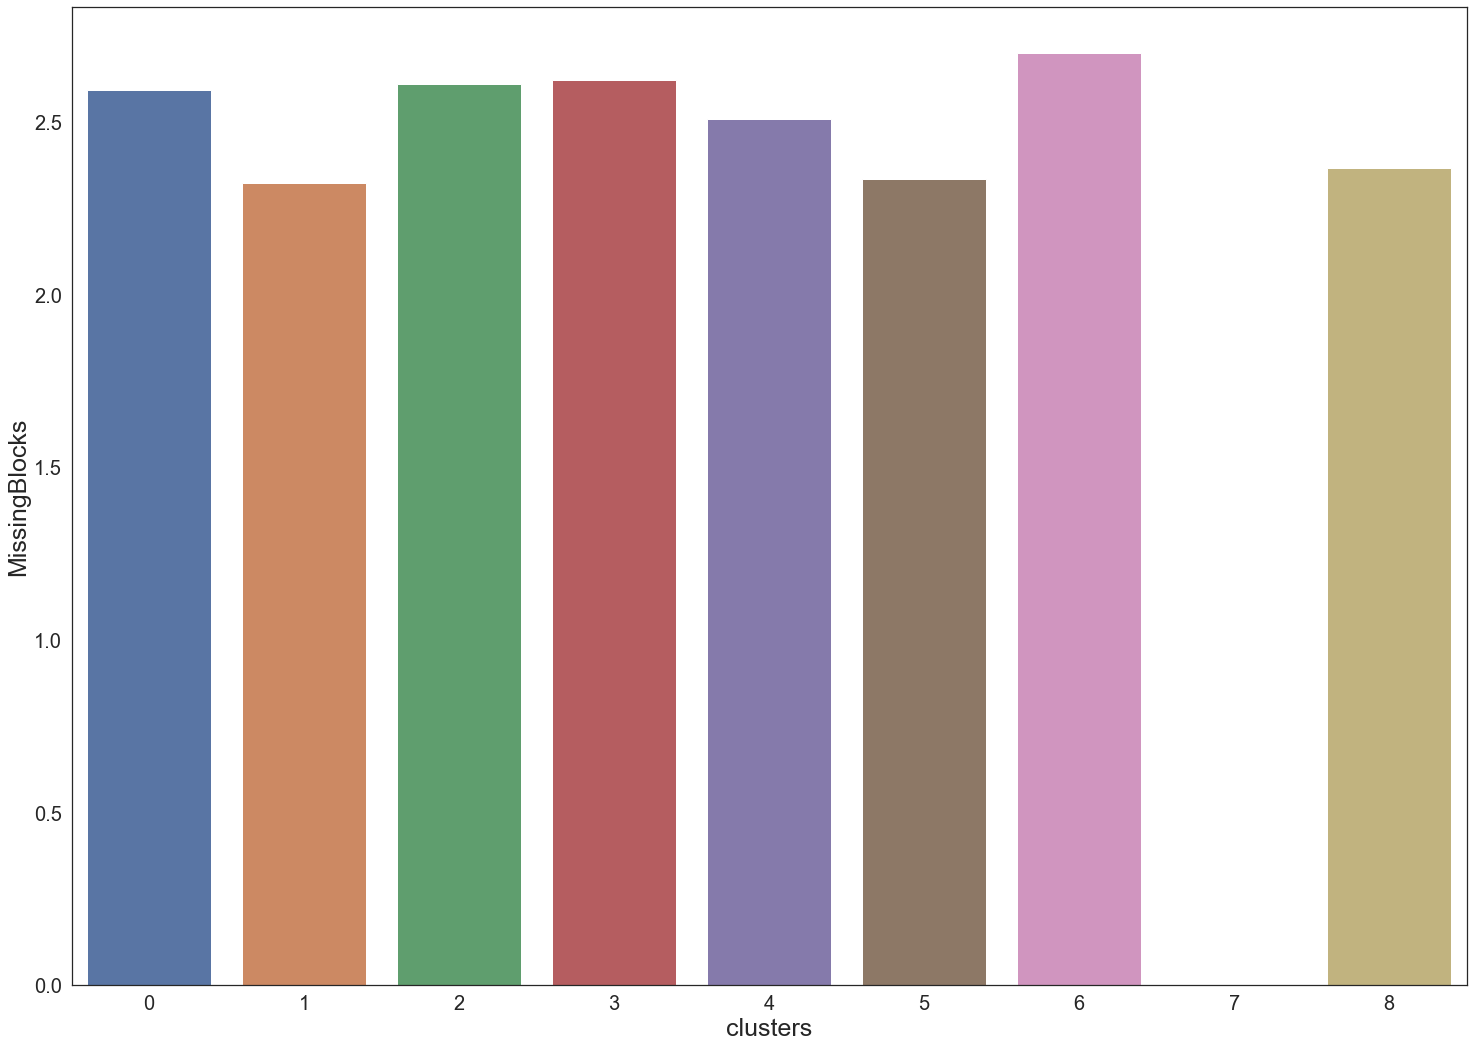

In [286]:
# Bar plots!
sns.set_style(style='white')

for i, df in enumerate(stdev_per_cluster_dfs):
    plt.figure(figsize=(25,18))
    a = sns.barplot(x=df.columns[0], y=df.columns[1], data=df)
    a.set_xlabel(df.columns[0],fontsize=25)
    a.set_ylabel(df.columns[1],fontsize=25)
    a.tick_params(labelsize=20)
    plt.savefig(f'barplots/barplot_{df.columns[0]}_{df.columns[1]}.png')